# Projecto de ML
O projecto consiste em três fases:
- Exploratory Data Analysis
- Modelling
- Evaluation

1. Da Exploratory Data Analysis resultará um dataframe (df_orto_cleaned), que terá todos os missings tratados e terá unicamente as colunas consideradas relavantes após EDA.

2. Caso os dados estejam desbalanceados serão criados 2 dataframes para cada um dos metodos de balanceamento dados em aula, Undersampling (df_orto_under) e Oversampling (df_orto_over)

3. Todos os modelos de treino escolhidos serão executados para os 3 dataframes: df_orto_cleaned, df_orto_under e df_orto_over.
    1. Os modelos dados em aula foram: Decision Tree, Regressão Logística e Random Forest
    
    2. Em cada modelo será treinado com dois datasets de treino: split 70/30 e cross-validation

4. Todos os modelos resultantes terão se ser avaliados através das suas confusion matrix (conf_mtx_modelname_dfName_methodName)

In [1]:
import os
# preparação do ambiente de trabalho
print(os.getcwd())
os.chdir(os.path.dirname(os.getcwd())) #
print(os.getcwd())

c:\Users\raque\OneDrive\Desktop\PG HDS\Aulas - 3º Trimestre\Machine Learning\Projeto_ML\Projeto_final_Entregaveis\Proj-Notebooks
c:\Users\raque\OneDrive\Desktop\PG HDS\Aulas - 3º Trimestre\Machine Learning\Projeto_ML\Projeto_final_Entregaveis


# Exploratory Data Analysis (EDA)
Aqui iremos:

1. Importar o excel para o df_orto
2. Validar dimensões e dados importados
3. Criar coluna Target e validar a sua distibuição
4. Transformar todas a variáveis em valores numéricos 
5. Validar a existencia de duplicados e remove-los
6. Validar se alterou a distribuição da target
7. Validar a existência de missings e tratá-los
8. Validar a variancia das variáveis e eliminar variáveis com 99% de resultados iguais
9. Verificar a existencia e tratar outliers (eliminação IQR ou substituição pelos limites)
10. Analise univariada
11. Analise bi variada
12. Analise multivariada - correlação
13. Output (df_orto_cleaned)



## 1. Importar o excel para o df_orto

In [2]:
import pandas as pd
import seaborn as sns 

df_orto = pd.read_excel('ML_Ortopedia_CPAK.xlsx')

## 2. Validar dimensões e dados importados

In [3]:
#2. Validar dimensões e dados importados
#Ver a dimensão do dataset
print('df_orto.shape:',df_orto.shape)

#Print das primeiras 15 linhas do dataframe
print('df_orto.head(15):')
df_orto.head(15)

df_orto.shape: (265, 22)
df_orto.head(15):


,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Grupo_pos,Fle_0,EVA_0,PM6_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
0,67,1,80,158,32.046146,5.0,5,86,4,324,...,54,75,80,1,290,5,1,9,15,8
1,76,2,60,155,24.973985,5.0,5,90,4,357,...,39,60,110,1,480,5,4,3,12,9
2,72,2,93,182,28.076319,1.0,1,45,10,289,...,53,72,100,0,388,0,0,0,0,10
3,67,2,71,163,26.722873,6.0,6,127,2,390,...,16,18,100,0,387,2,0,10,12,9
4,66,1,49,160,19.140625,6.0,6,120,0,285,...,8,8,125,1,284,0,1,2,3,7
5,81,2,66,160,25.781250,4.0,4,82,4,135,...,26,38,85,1,242,2,1,6,9,9
6,72,1,63,162,24.005487,3.0,3,95,1,366,...,0,18,100,1,392,4,0,7,11,8
7,76,1,56,148,25.566107,6.0,6,65,9,249,...,43,63,75,1,262,2,1,7,10,7
8,81,1,81,162,30.864198,3.0,3,80,2,180,...,55,73,70,2,190,1,1,11,13,9
9,73,1,80,170,27.681661,5.0,5,95,0,501,...,44,59,114,0,424,0,0,2,2,9


In [4]:
#Print das últimas 15 linhas do dataframe
df_orto.tail(15)

,Idade,Sexo,Peso,Altura_cm,IMC,Grupo_pre,Grupo_pos,Fle_0,EVA_0,PM6_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
250,63,1,69,163,25.970116,5.0,2,105,8,260,...,52,74,128,7,332,4,2,14,20,9
251,82,1,56,149,25.224089,5.0,2,110,8,240,...,43,54,100,8,180,7,1,17,25,10
252,65,1,68,151,29.823253,2.0,2,120,4,220,...,37,52,108,0,330,2,1,10,13,10
253,52,1,58,140,29.591837,3.0,3,105,3,220,...,36,54,125,4,300,4,0,5,9,8
254,47,2,92,180,28.395062,5.0,5,120,3,360,...,20,30,85,1,340,1,2,5,8,8
255,75,1,70,162,26.672763,5.0,5,85,8,999,...,50,73,95,7,320,5,3,10,18,7
256,87,1,70,160,27.343750,5.0,5,90,6,240,...,32,48,135,0,180,2,0,17,19,8
257,74,1,57,155,23.725286,5.0,3,110,3,450,...,21,32,99,4,275,6,3,14,23,6
258,73,2,86,175,28.081633,2.0,2,150,4,370,...,16,30,121,1,505,2,1,2,5,10
259,67,1,76,160,29.687500,NaN,2,150,3,480,...,23,36,123,0,460,0,6,12,18,9


In [5]:
#Ver os tipos de variáveis
df_orto.dtypes

Idade           int64
Sexo            int64
Peso            int64
Altura_cm       int64
IMC           float64
Grupo_pre     float64
Grupo_pos       int64
Fle_0           int64
EVA_0           int64
PM6_0           int64
WD_0            int64
WR_0            int64
WAtotal_0       int64
WT_0            int64
Fle_90          int64
EVA_90          int64
PM6_90          int64
WD_90           int64
WR_90           int64
WAtotal_90      int64
WT_90           int64
Satisfação      int64
dtype: object

## 3. Criar coluna Target e validar a sua distibuição

In [6]:
import numpy as np
df_orto['target'] = np.where(df_orto['Grupo_pos']==df_orto['Grupo_pre'], 0, 1) 
#Colocar coluna target no inicio e eliminar colunas que deram origem à target
df_orto = df_orto[['target'] +[c for c in df_orto if c not in ['target','Grupo_pos','Grupo_pre']]]
df_orto.tail()

#justificar relatório

,target,Idade,Sexo,Peso,Altura_cm,IMC,Fle_0,EVA_0,PM6_0,WD_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
260,1,73,1,71,153,30.330215,92,8,220,11,...,41,57,115,1,340,1,1,16,18,10
261,1,77,2,63,161,24.304618,130,7,160,13,...,44,59,110,0,280,0,1,6,7,10
262,0,76,1,65,155,27.055151,80,9,60,15,...,46,68,87,1,240,1,2,9,12,10
263,0,70,1,54,169,18.906901,95,7,420,7,...,24,34,100,0,600,0,2,4,6,999
264,0,79,2,92,182,27.774423,130,6,320,14,...,24,38,128,2,360,0,0,9,9,9


df_orto['target'].value_counts():
target
0    236
1     29
Name: count, dtype: int64
df_orto['target'].value_counts(normalize=True):
target
0    0.890566
1    0.109434
Name: proportion, dtype: float64


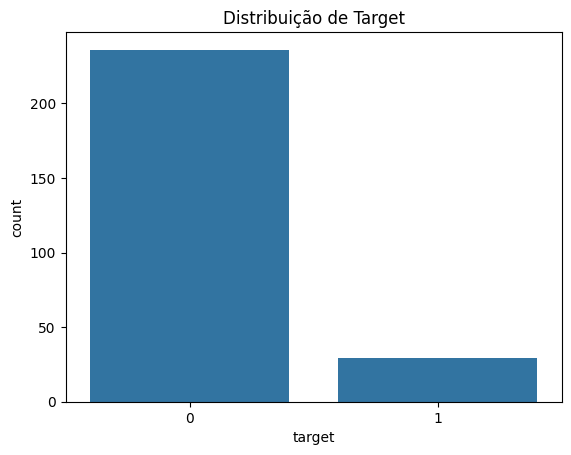

In [7]:
#Quantas observações temos por cada valor da target?
print("df_orto['target'].value_counts():")
print(df_orto['target'].value_counts())

#Qual a distribuição da target?
print("df_orto['target'].value_counts(normalize=True):")
print(df_orto['target'].value_counts(normalize=True))

# Criar um countplot para ver a distribuição da target

import matplotlib.pyplot as plt
import seaborn as sns 

sns.countplot(x='target', data=df_orto)

plt.title("Distribuição de Target")
plt.xlabel('target')
plt.ylabel('count')
plt.show()


## 4. Transformar todas a variáveis em valores numéricos

In [8]:
#validar quais as variáveis que não são numéricas
df_orto.dtypes

target          int32
Idade           int64
Sexo            int64
Peso            int64
Altura_cm       int64
IMC           float64
Fle_0           int64
EVA_0           int64
PM6_0           int64
WD_0            int64
WR_0            int64
WAtotal_0       int64
WT_0            int64
Fle_90          int64
EVA_90          int64
PM6_90          int64
WD_90           int64
WR_90           int64
WAtotal_90      int64
WT_90           int64
Satisfação      int64
dtype: object

In [9]:
#Todas as variáveis são numéricas não há necessidade de fazer a transformação

## 5. Validar a existencia de duplicados e remove-los

In [10]:
#Ver se existem linhas duplicadas
print(f"Existem {df_orto.duplicated().sum()} duplicados")
df_orto[df_orto.duplicated()]

Existem 0 duplicados


,target,Idade,Sexo,Peso,Altura_cm,IMC,Fle_0,EVA_0,PM6_0,WD_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação


In [11]:
#Não existem duplicados pelo que não há necessidade de eliminação

## 6. Validar se alterou a distribuição da target (skipped, não há duplicados)

## 7. Validar a existência de missings e tratá-los

In [12]:
#ver quantos missings existem
df_orto.isnull().sum()

target        0
Idade         0
Sexo          0
Peso          0
Altura_cm     0
IMC           0
Fle_0         0
EVA_0         0
PM6_0         0
WD_0          0
WR_0          0
WAtotal_0     0
WT_0          0
Fle_90        0
EVA_90        0
PM6_90        0
WD_90         0
WR_90         0
WAtotal_90    0
WT_90         0
Satisfação    0
dtype: int64

In [13]:
# Embora não sejam reportados missings pelo pandas, sabemos de antemão que os missings estão a ser representados por 999
# Será feito um replace de 999 por NaN e validado novamente
# Como 999 não tem significado para nenhuma das colunas será aplicado o replace em todo o dataframe

df_orto=df_orto.replace({999:np.NaN})

#ver quantos missings existem
df_orto.isnull().sum()

target         0
Idade          0
Sexo           0
Peso           2
Altura_cm      2
IMC            2
Fle_0          3
EVA_0          6
PM6_0          3
WD_0           0
WR_0           0
WAtotal_0      1
WT_0           0
Fle_90         2
EVA_90         4
PM6_90         2
WD_90          0
WR_90          0
WAtotal_90     0
WT_90          0
Satisfação    10
dtype: int64

In [14]:
#Calcular a percentagem de missings de todas as variáveis 
df_orto.isnull().sum()/len(df_orto)*100

target        0.000000
Idade         0.000000
Sexo          0.000000
Peso          0.754717
Altura_cm     0.754717
IMC           0.754717
Fle_0         1.132075
EVA_0         2.264151
PM6_0         1.132075
WD_0          0.000000
WR_0          0.000000
WAtotal_0     0.377358
WT_0          0.000000
Fle_90        0.754717
EVA_90        1.509434
PM6_90        0.754717
WD_90         0.000000
WR_90         0.000000
WAtotal_90    0.000000
WT_90         0.000000
Satisfação    3.773585
dtype: float64

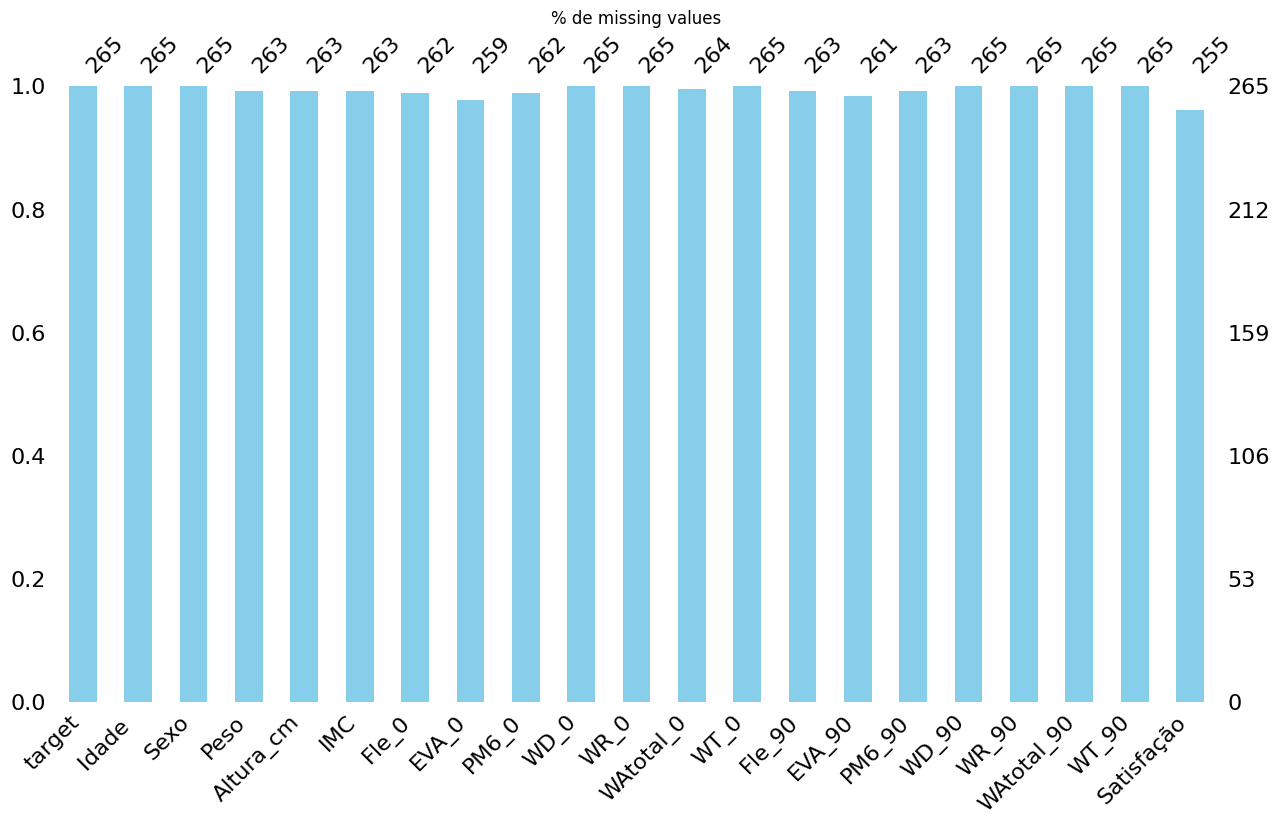

<Axes: >

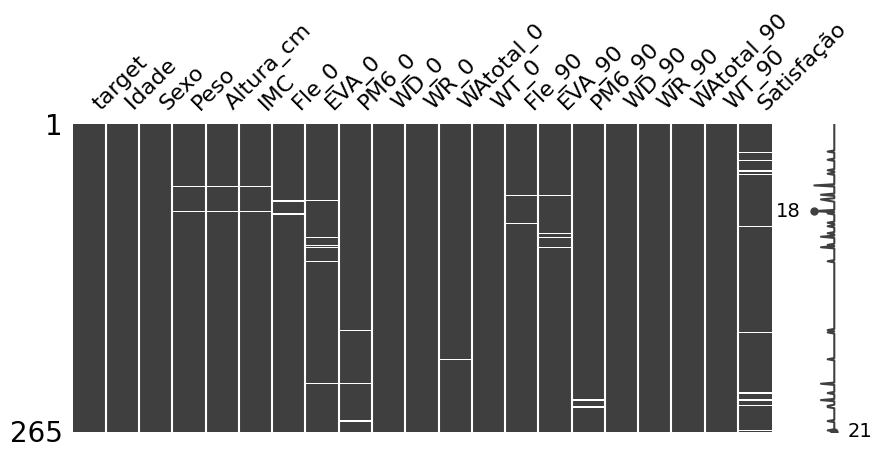

In [15]:
# Visualização dos missings
import missingno as msno

msno.bar(df_orto, figsize=(15,8), color='skyblue')
plt.title("% de missing values")
plt.show()

msno.matrix(df_orto, figsize=(10,4))

In [16]:
#Tendo em conta a baixa existência de missings em cada coluna não há necessidade de remover colunas

lst_missing=pd.DataFrame(df_orto.apply(lambda x: x.isnull().sum(), axis=0)/len(df_orto))
lst_missing=lst_missing.rename(columns={0:"Missing (%)"})
lst_missing=lst_missing.reset_index()
lst_missing=lst_missing.rename(columns={'index':'Variable'})
lst_missing=lst_missing[lst_missing['Missing (%)'] > 0]
lst_missing

print('Variáveis com missings')
lst_missing


Variáveis com missings


,Variable,Missing (%)
3,Peso,0.007547
4,Altura_cm,0.007547
5,IMC,0.007547
6,Fle_0,0.011321
7,EVA_0,0.022642
8,PM6_0,0.011321
11,WAtotal_0,0.003774
13,Fle_90,0.007547
14,EVA_90,0.015094
15,PM6_90,0.007547


In [17]:
import pandas as pd

# Definição das listas de tipos de variáveis
variaveis_ordinais = ['Satisfação', 'EVA_0', 'EVA_90']
variaveis_continuas = ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'PM6_90', 'Fle_0', 'Fle_90']
variaveis_categoricas = ['Sexo']
variaveis_discretas = ['WAtotal_0', 'WAtotal_90', 'WD_0', 'WD_90', 'WR_0', 'WR_90', 'Idade ']

for var in lst_missing['Variable']:
    if var in variaveis_continuas:
        df_orto[var] = df_orto[var].fillna(df_orto[var].mean())
    elif var in variaveis_ordinais:
        moda = df_orto[var].mode().iloc[0]  # Encontra a moda
        df_orto[var] = df_orto[var].fillna(moda)  # Imputa a moda
        df_orto[var] = df_orto[var].astype(int)  # Converte para int e mantém como int
    elif var in variaveis_categoricas:
        df_orto[var] = df_orto[var].fillna(df_orto[var].mode().iloc[0])
    elif var in variaveis_discretas:
        df_orto[var] = df_orto[var].fillna(df_orto[var].mean())

print("Variáveis ordinais:", variaveis_ordinais)
print("Variáveis contínuas:", variaveis_continuas)
print("Variáveis categóricas:", variaveis_categoricas)
print("Variáveis discretas:", variaveis_discretas)


Variáveis ordinais: ['Satisfação', 'EVA_0', 'EVA_90']
Variáveis contínuas: ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'PM6_90', 'Fle_0', 'Fle_90']
Variáveis categóricas: ['Sexo']
Variáveis discretas: ['WAtotal_0', 'WAtotal_90', 'WD_0', 'WD_90', 'WR_0', 'WR_90', 'Idade ']


In [18]:
print(df_orto.isnull().sum())

target        0
Idade         0
Sexo          0
Peso          0
Altura_cm     0
IMC           0
Fle_0         0
EVA_0         0
PM6_0         0
WD_0          0
WR_0          0
WAtotal_0     0
WT_0          0
Fle_90        0
EVA_90        0
PM6_90        0
WD_90         0
WR_90         0
WAtotal_90    0
WT_90         0
Satisfação    0
dtype: int64


In [19]:
# Validar que todas as variáveis estão com os tipos certos
df_orto.dtypes

target          int32
Idade           int64
Sexo            int64
Peso          float64
Altura_cm     float64
IMC           float64
Fle_0         float64
EVA_0           int32
PM6_0         float64
WD_0            int64
WR_0            int64
WAtotal_0     float64
WT_0            int64
Fle_90        float64
EVA_90          int32
PM6_90        float64
WD_90           int64
WR_90           int64
WAtotal_90      int64
WT_90           int64
Satisfação      int32
dtype: object

## 8. Validar a variancia das variáveis e eliminar variáveis com 99% de resultados iguais

In [20]:
#Quanto maior, mais disperso estão os dados
# Calcular a variância
variance = df_orto.var()

# Converter a série num DataFrame e dar um nome à coluna
variance_df = variance.reset_index()
variance_df.columns = ['Variável', 'Variância']
# Ordenar o DataFrame pela variância, do maior para o menor
variance_df = variance_df.sort_values(by='Variância', ascending=False)

# Ver o DataFrame
variance_df
###ATT à análise das variáveis ordinais. 

,Variável,Variância
8,PM6_0,10905.320900
15,PM6_90,8166.833938
6,Fle_0,495.141164
12,WT_0,254.557662
3,Peso,222.312190
13,Fle_90,188.646561
11,WAtotal_0,151.960686
4,Altura_cm,105.913181
19,WT_90,104.573899
18,WAtotal_90,62.992653


In [21]:
#Obter uma lista com as variáveis com mais de 99% de valores iguais
variable = []
columns= df_orto.columns

for i in range(0, len(variance)):
    if variance[i]<=0.01: #variancia inferior a 0.01 = 99% dos dados iguais
        variable.append(columns[i])

print(f"As variáveis com 99% de valores iguais são: {variable}")

As variáveis com 99% de valores iguais são: []


C:\Users\raque\AppData\Local\Temp\ipykernel_7564\3658803633.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if variance[i]<=0.01: #variancia inferior a 0.01 = 99% dos dados iguais


In [22]:
#Não existem variáveis com 99% dos dados iguais, alias como já era de esperar pelos resultados da variancia. Não existe necessidade de eliminar variáveis

## 9. Verificar a existencia e tratar outliers (eliminação ou substituição pelos limites IQR)

In [23]:
# A verificação de outliers só pode ser feita em variáveis quantitativas e ordinais 
var_num = variaveis_continuas + variaveis_discretas + variaveis_ordinais


In [24]:
# Validar que está tudo correcto no sub dataframe
df_orto[var_num]

,Peso,Altura_cm,IMC,PM6_0,PM6_90,Fle_0,Fle_90,WAtotal_0,WAtotal_90,WD_0,WD_90,WR_0,WR_90,Idade,Satisfação,EVA_0,EVA_90
0,80.0,158.0,32.046146,324.0,290.0,86.0,80.0,54.0,9,15,5,6,1,67,8,4,1
1,60.0,155.0,24.973985,357.0,480.0,90.0,110.0,39.0,3,14,5,7,4,76,9,4,1
2,93.0,182.0,28.076319,289.0,388.0,45.0,100.0,53.0,0,15,0,4,0,72,10,10,0
3,71.0,163.0,26.722873,390.0,387.0,127.0,100.0,16.0,10,1,2,1,0,67,9,2,0
4,49.0,160.0,19.140625,285.0,284.0,120.0,125.0,8.0,2,0,0,0,1,66,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,71.0,153.0,30.330215,220.0,340.0,92.0,115.0,41.0,16,11,1,5,1,73,10,8,1
261,63.0,161.0,24.304618,160.0,280.0,130.0,110.0,44.0,6,13,0,2,1,77,10,7,0
262,65.0,155.0,27.055151,60.0,240.0,80.0,87.0,46.0,9,15,1,7,2,76,10,9,1
263,54.0,169.0,18.906901,420.0,600.0,95.0,100.0,24.0,4,7,0,3,2,70,10,7,0


In [25]:
var_int_save = [f for f in df_orto.columns if df_orto.dtypes[f] == 'int64']
df_orto.dtypes



target          int32
Idade           int64
Sexo            int64
Peso          float64
Altura_cm     float64
IMC           float64
Fle_0         float64
EVA_0           int32
PM6_0         float64
WD_0            int64
WR_0            int64
WAtotal_0     float64
WT_0            int64
Fle_90        float64
EVA_90          int32
PM6_90        float64
WD_90           int64
WR_90           int64
WAtotal_90      int64
WT_90           int64
Satisfação      int32
dtype: object

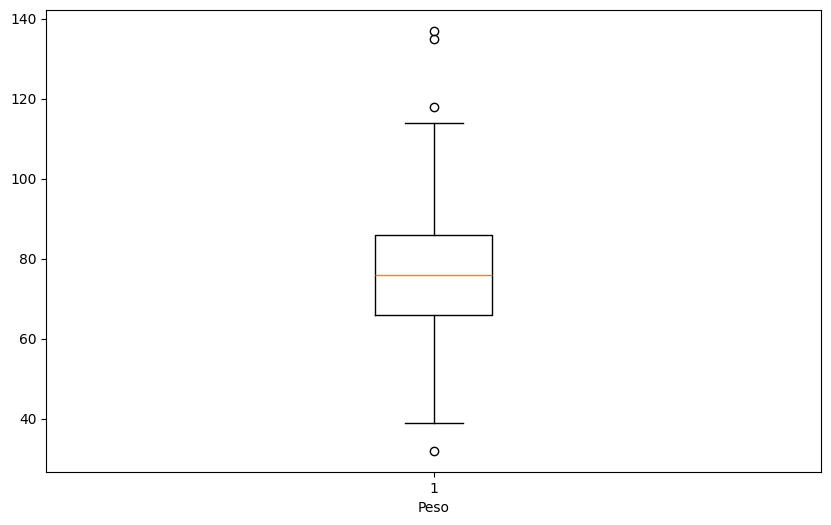

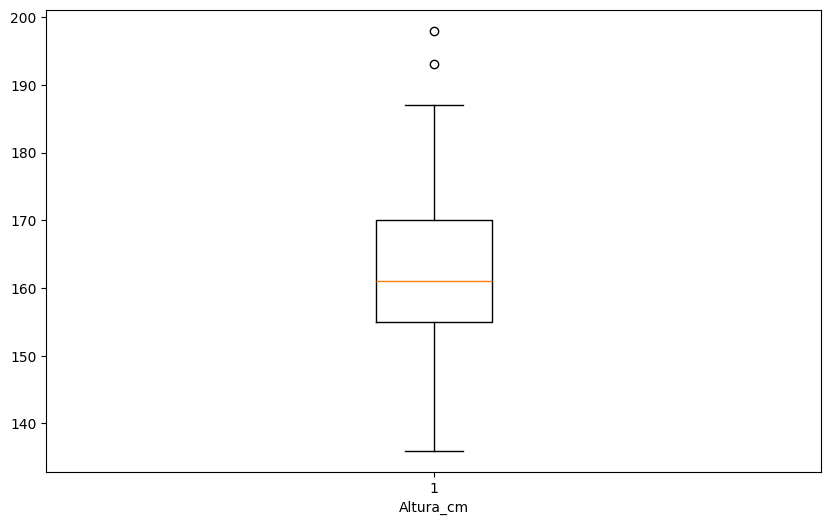

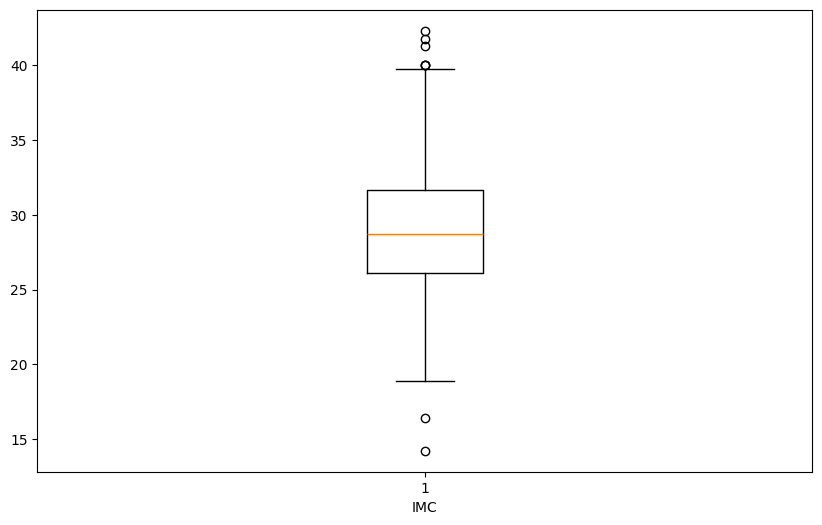

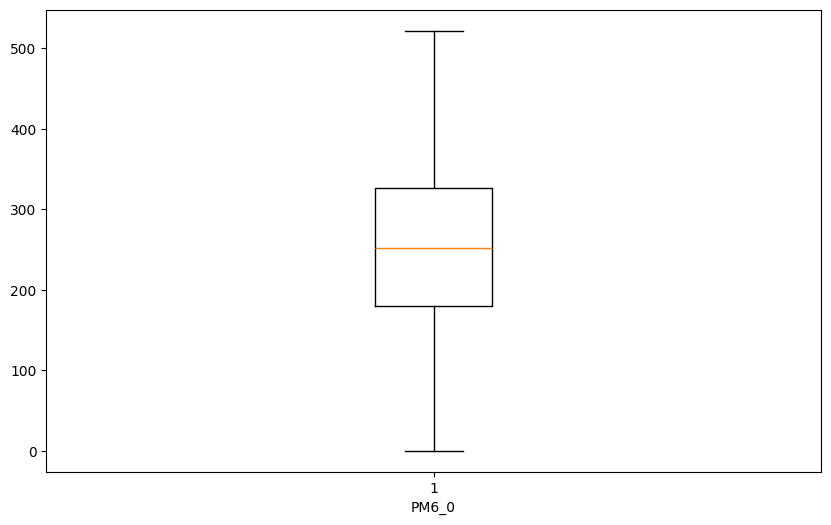

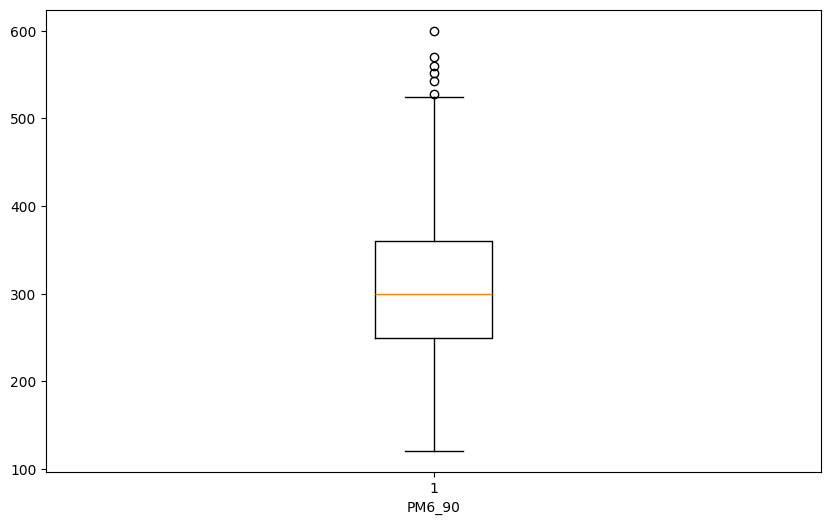

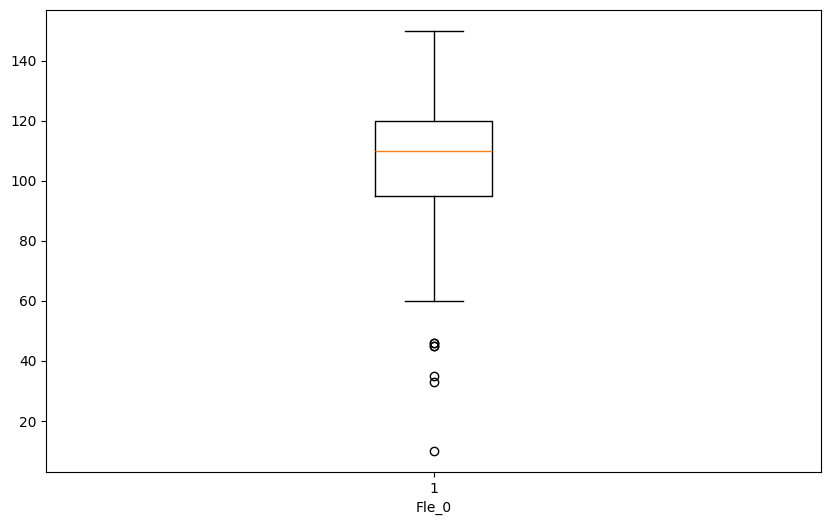

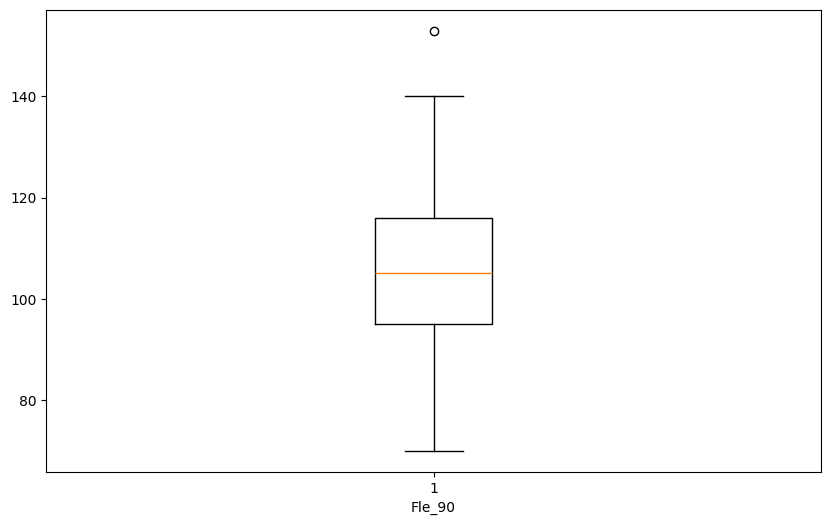

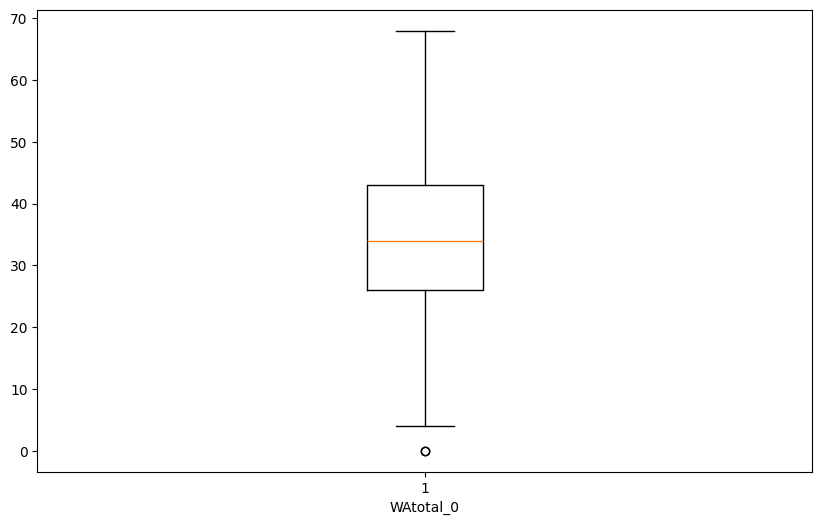

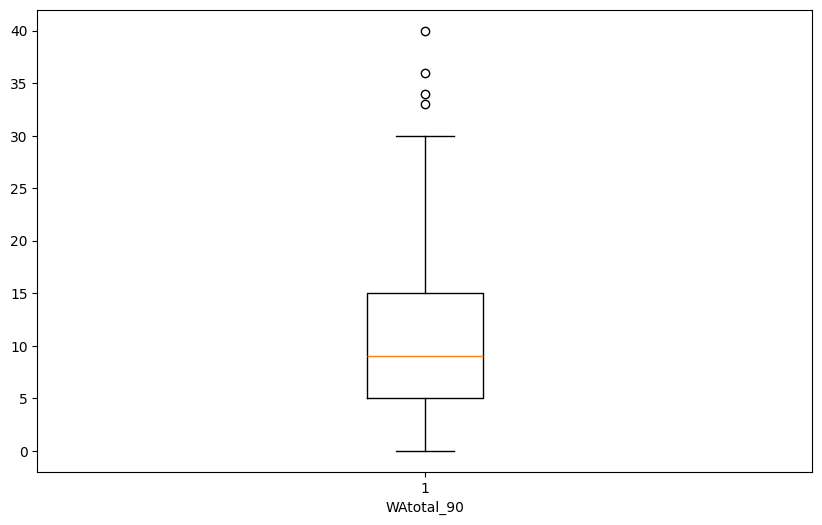

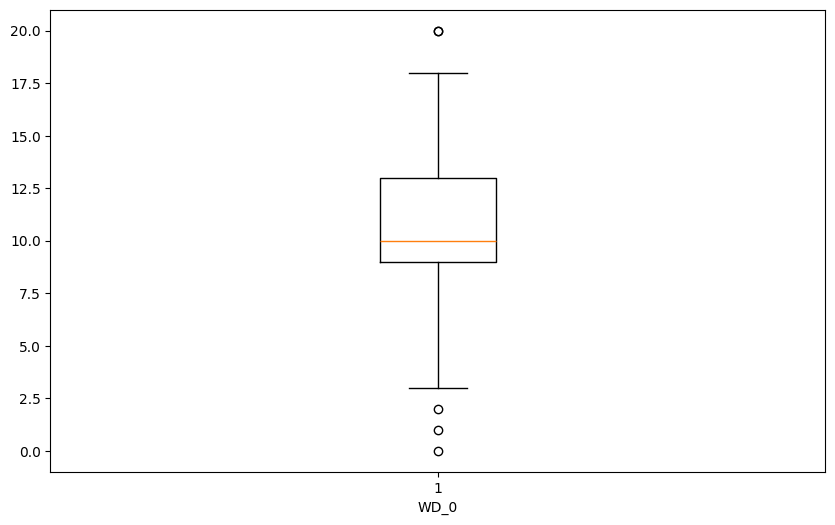

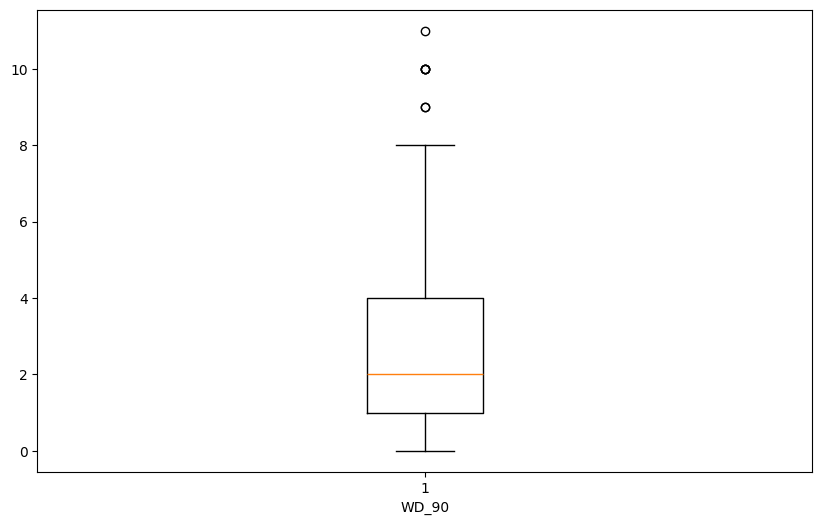

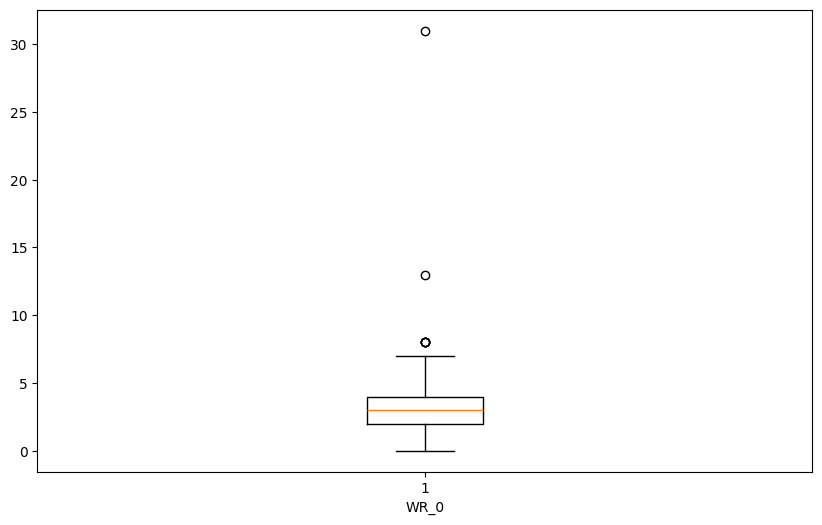

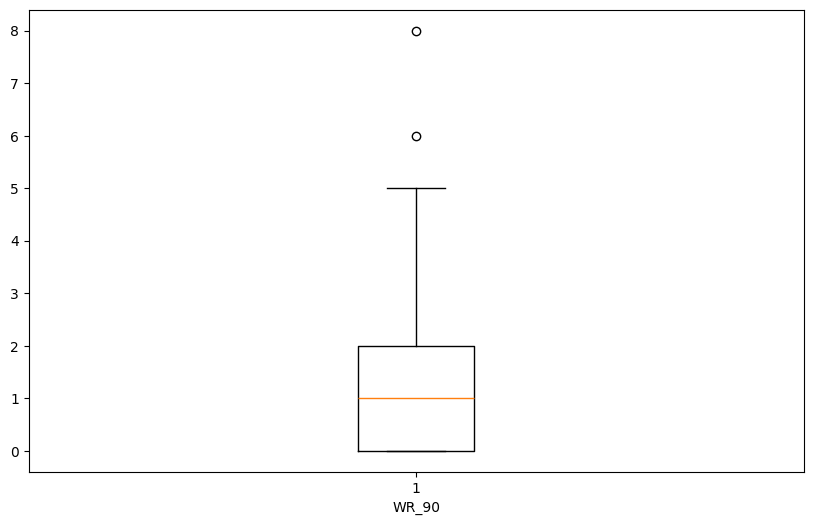

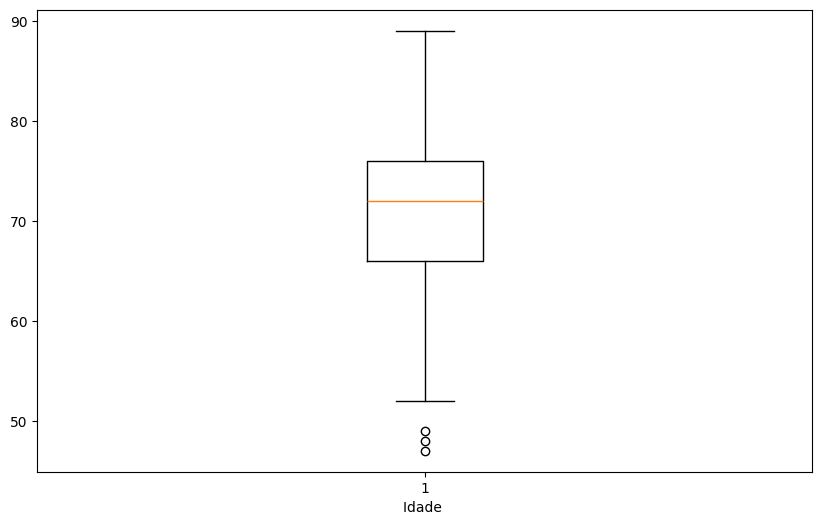

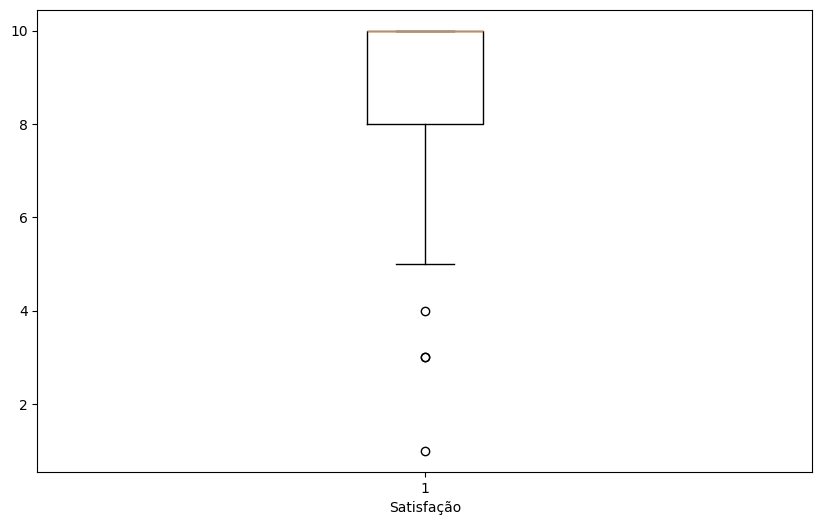

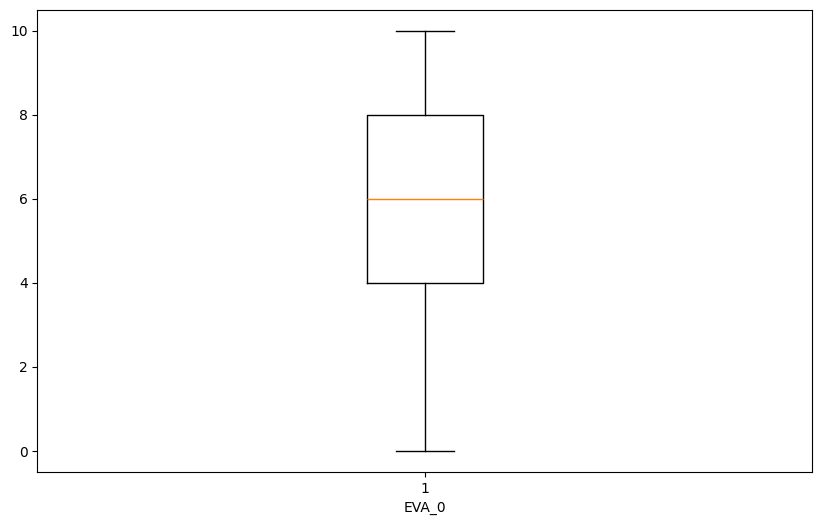

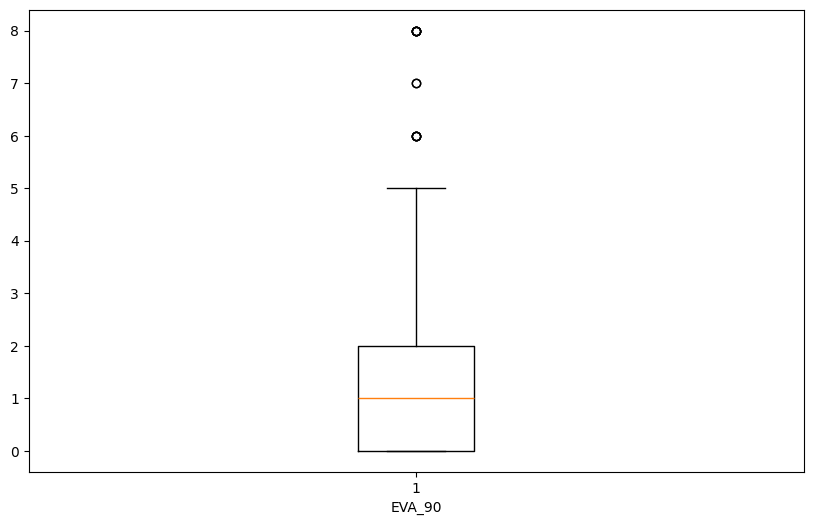

In [26]:
# desenhar boxplots para verificação visual dos outliers
for col in df_orto[var_num].columns:
    plt.figure(figsize=(10,6)) #indicar o tamanho do gráfico
    plt.boxplot(df_orto[col])
    plt.xlabel(col) 

In [27]:
df_orto[var_num].describe()

,Peso,Altura_cm,IMC,PM6_0,PM6_90,Fle_0,Fle_90,WAtotal_0,WAtotal_90,WD_0,WD_90,WR_0,WR_90,Idade,Satisfação,EVA_0,EVA_90
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000,265.000000,265.000000
mean,77.258555,162.600760,29.149885,255.603053,310.916350,106.839695,105.965779,34.871212,10.747170,10.743396,2.701887,3.079245,1.286792,71.14717,8.894340,5.618868,1.501887
std,14.910137,10.291413,4.502272,104.428544,90.370537,22.251768,13.734867,12.327234,7.936791,3.463309,2.455243,2.735385,1.311666,7.62851,1.480993,2.385647,1.956196
min,32.000000,136.000000,14.222222,0.000000,121.000000,10.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.00000,1.000000,0.000000,0.000000
25%,66.000000,155.000000,26.122449,180.000000,249.000000,95.000000,95.000000,26.000000,5.000000,9.000000,1.000000,2.000000,0.000000,66.00000,8.000000,4.000000,0.000000
50%,76.000000,161.000000,28.731747,252.000000,300.000000,110.000000,105.000000,34.000000,9.000000,10.000000,2.000000,3.000000,1.000000,72.00000,10.000000,6.000000,1.000000
75%,86.000000,170.000000,31.644318,326.000000,360.000000,120.000000,116.000000,43.000000,15.000000,13.000000,4.000000,4.000000,2.000000,76.00000,10.000000,8.000000,2.000000
max,137.000000,198.000000,42.324275,522.000000,600.000000,150.000000,153.000000,68.000000,40.000000,20.000000,11.000000,31.000000,8.000000,89.00000,10.000000,10.000000,8.000000


In [28]:
import numpy as np

#calcular os valores para o interquartile range
for col in df_orto[var_num]:
    q1=np.percentile(df_orto[col],25)
    q3=np.percentile(df_orto[col],75)
    iqr=q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    print(f"Para a variável {col} o Q1 é {q1}, o Q3 é {q3}, o interquartile range é {iqr}, o limite inferior é {lower_limit} e o superior é {upper_limit}")

    print(f"Outliers abaixo do limite inferior: {(df_orto[col]< lower_limit).sum()}")

    print(f"Outliers abaixo do limite superior: {(df_orto[col]> upper_limit).sum()}")

Para a variável Peso o Q1 é 66.0, o Q3 é 86.0, o interquartile range é 20.0, o limite inferior é 36.0 e o superior é 116.0
Outliers abaixo do limite inferior: 1
Outliers abaixo do limite superior: 3
Para a variável Altura_cm o Q1 é 155.0, o Q3 é 170.0, o interquartile range é 15.0, o limite inferior é 132.5 e o superior é 192.5
Outliers abaixo do limite inferior: 0
Outliers abaixo do limite superior: 2
Para a variável IMC o Q1 é 26.122448979591837, o Q3 é 31.644317867172973, o interquartile range é 5.521868887581135, o limite inferior é 17.839645648220134 e o superior é 39.927121198544675
Outliers abaixo do limite inferior: 2
Outliers abaixo do limite superior: 6
Para a variável PM6_0 o Q1 é 180.0, o Q3 é 326.0, o interquartile range é 146.0, o limite inferior é -39.0 e o superior é 545.0
Outliers abaixo do limite inferior: 0
Outliers abaixo do limite superior: 0
Para a variável PM6_90 o Q1 é 249.0, o Q3 é 360.0, o interquartile range é 111.0, o limite inferior é 82.5 e o superior é 52

In [29]:
# eliminação de outliers 
#eliminar outliers com base no IQR
df_orto2=df_orto

for col in df_orto[var_num]:
    q1=np.percentile(df_orto[col],25)
    q3=np.percentile(df_orto[col],75)
    iqr=q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]

C:\Users\raque\AppData\Local\Temp\ipykernel_7564\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_7564\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_7564\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_7564\3795221628.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orto2=df_orto2[(df_orto[col]>=lower_limit) & (df_orto[col]<=upper_limit)]
C:\Users\raque\AppData\Local\Temp\ipykernel_7564\3795221628.py:12: UserWarning: Boolean Series key will be reind

In [30]:
#substituir os valores dos outliers pelos limites inferior e superior
df_orto3=df_orto

for col in df_orto[var_num]:
    q1=np.percentile(df_orto[col],25)
    q3=np.percentile(df_orto[col],75)
    iqr=q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    df_orto3[col]=np.where(df_orto[col]<lower_limit, lower_limit, df_orto3[col])
    df_orto3[col]=np.where(df_orto[col]>upper_limit, upper_limit, df_orto3[col])


In [31]:
#Comparação entre os dois metodos e o original
print("df_orto[var_num].describe()")
df_orto[var_num].describe()

df_orto[var_num].describe()


,Peso,Altura_cm,IMC,PM6_0,PM6_90,Fle_0,Fle_90,WAtotal_0,WAtotal_90,WD_0,WD_90,WR_0,WR_90,Idade,Satisfação,EVA_0,EVA_90
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,77.115159,162.578119,29.146252,255.603053,310.184274,107.377431,105.945025,34.874986,10.660377,10.758491,2.666038,2.947170,1.271698,71.181132,8.928302,5.618868,1.400000
std,14.338788,10.219495,4.387928,104.428544,88.397222,20.655827,13.667514,12.316590,7.682485,3.384761,2.355839,2.021907,1.252933,7.530570,1.353500,2.385647,1.687297
min,36.000000,136.000000,17.839646,0.000000,121.000000,57.500000,70.000000,0.500000,0.000000,3.000000,0.000000,0.000000,0.000000,51.000000,5.000000,0.000000,0.000000
25%,66.000000,155.000000,26.122449,180.000000,249.000000,95.000000,95.000000,26.000000,5.000000,9.000000,1.000000,2.000000,0.000000,66.000000,8.000000,4.000000,0.000000
50%,76.000000,161.000000,28.731747,252.000000,300.000000,110.000000,105.000000,34.000000,9.000000,10.000000,2.000000,3.000000,1.000000,72.000000,10.000000,6.000000,1.000000
75%,86.000000,170.000000,31.644318,326.000000,360.000000,120.000000,116.000000,43.000000,15.000000,13.000000,4.000000,4.000000,2.000000,76.000000,10.000000,8.000000,2.000000
max,116.000000,192.500000,39.927121,522.000000,526.500000,150.000000,147.500000,68.000000,30.000000,19.000000,8.500000,7.000000,5.000000,89.000000,10.000000,10.000000,5.000000


In [32]:
print("df_orto2[var_num].describe()")
df_orto2[var_num].describe()

df_orto2[var_num].describe()


,Peso,Altura_cm,IMC,PM6_0,PM6_90,Fle_0,Fle_90,WAtotal_0,WAtotal_90,WD_0,WD_90,WR_0,WR_90,Idade,Satisfação,EVA_0,EVA_90
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,77.030887,162.512803,29.117007,256.982019,308.213270,108.036395,105.611212,34.881517,9.853081,10.682464,2.331754,2.800948,1.151659,71.450237,9.037915,5.592417,1.118483
std,12.966979,9.561888,3.897120,98.639865,82.220476,19.638448,13.029291,11.616908,6.926294,3.212865,2.061873,1.886846,1.152940,7.386676,1.222209,2.270880,1.431013
min,51.000000,136.000000,20.047446,15.000000,121.000000,60.000000,70.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,52.000000,5.000000,0.000000,0.000000
25%,67.000000,155.000000,26.454497,182.000000,249.000000,95.000000,95.000000,26.000000,4.000000,8.500000,0.000000,2.000000,0.000000,66.500000,8.000000,4.000000,0.000000
50%,77.000000,161.000000,28.719723,255.000000,300.000000,110.000000,105.000000,34.000000,9.000000,10.000000,2.000000,3.000000,1.000000,72.000000,10.000000,6.000000,0.000000
75%,85.000000,170.000000,31.613783,322.500000,360.000000,120.000000,115.000000,43.000000,14.000000,13.000000,4.000000,4.000000,2.000000,77.000000,10.000000,7.000000,2.000000
max,114.000000,187.000000,39.758205,522.000000,524.000000,150.000000,140.000000,63.000000,30.000000,18.000000,8.000000,7.000000,4.000000,89.000000,10.000000,10.000000,5.000000


In [33]:
print("df_orto3[var_num].describe()")
df_orto3[var_num].describe()

df_orto3[var_num].describe()


,Peso,Altura_cm,IMC,PM6_0,PM6_90,Fle_0,Fle_90,WAtotal_0,WAtotal_90,WD_0,WD_90,WR_0,WR_90,Idade,Satisfação,EVA_0,EVA_90
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,77.115159,162.578119,29.146252,255.603053,310.184274,107.377431,105.945025,34.874986,10.660377,10.758491,2.666038,2.947170,1.271698,71.181132,8.928302,5.618868,1.400000
std,14.338788,10.219495,4.387928,104.428544,88.397222,20.655827,13.667514,12.316590,7.682485,3.384761,2.355839,2.021907,1.252933,7.530570,1.353500,2.385647,1.687297
min,36.000000,136.000000,17.839646,0.000000,121.000000,57.500000,70.000000,0.500000,0.000000,3.000000,0.000000,0.000000,0.000000,51.000000,5.000000,0.000000,0.000000
25%,66.000000,155.000000,26.122449,180.000000,249.000000,95.000000,95.000000,26.000000,5.000000,9.000000,1.000000,2.000000,0.000000,66.000000,8.000000,4.000000,0.000000
50%,76.000000,161.000000,28.731747,252.000000,300.000000,110.000000,105.000000,34.000000,9.000000,10.000000,2.000000,3.000000,1.000000,72.000000,10.000000,6.000000,1.000000
75%,86.000000,170.000000,31.644318,326.000000,360.000000,120.000000,116.000000,43.000000,15.000000,13.000000,4.000000,4.000000,2.000000,76.000000,10.000000,8.000000,2.000000
max,116.000000,192.500000,39.927121,522.000000,526.500000,150.000000,147.500000,68.000000,30.000000,19.000000,8.500000,7.000000,5.000000,89.000000,10.000000,10.000000,5.000000


In [34]:
print(df_orto['target'].value_counts())
print(df_orto2['target'].value_counts())
print(df_orto3['target'].value_counts())

target
0    236
1     29
Name: count, dtype: int64
target
0    192
1     19
Name: count, dtype: int64
target
0    236
1     29
Name: count, dtype: int64


In [35]:
percent_drops=100-((len(df_orto2)/len(df_orto))*100)
print("percentagem de registos perdidos usando o metodo de eliminação:", percent_drops)


percentagem de registos perdidos usando o metodo de eliminação: 20.37735849056604


In [36]:
#devido à elevada percentagem opta-se pelo metodo da substituição e portanto o df_orto3 será o usado daqui para a frente
df_orto3

,target,Idade,Sexo,Peso,Altura_cm,IMC,Fle_0,EVA_0,PM6_0,WD_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
0,0,67.0,1,80.0,158.0,32.046146,86.0,4.0,324.0,15.0,...,54.0,75,80.0,1.0,290.0,5.0,1.0,9.0,15,8.0
1,0,76.0,2,60.0,155.0,24.973985,90.0,4.0,357.0,14.0,...,39.0,60,110.0,1.0,480.0,5.0,4.0,3.0,12,9.0
2,0,72.0,2,93.0,182.0,28.076319,57.5,10.0,289.0,15.0,...,53.0,72,100.0,0.0,388.0,0.0,0.0,0.0,0,10.0
3,0,67.0,2,71.0,163.0,26.722873,127.0,2.0,390.0,3.0,...,16.0,18,100.0,0.0,387.0,2.0,0.0,10.0,12,9.0
4,0,66.0,1,49.0,160.0,19.140625,120.0,0.0,285.0,3.0,...,8.0,8,125.0,1.0,284.0,0.0,1.0,2.0,3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,73.0,1,71.0,153.0,30.330215,92.0,8.0,220.0,11.0,...,41.0,57,115.0,1.0,340.0,1.0,1.0,16.0,18,10.0
261,1,77.0,2,63.0,161.0,24.304618,130.0,7.0,160.0,13.0,...,44.0,59,110.0,0.0,280.0,0.0,1.0,6.0,7,10.0
262,0,76.0,1,65.0,155.0,27.055151,80.0,9.0,60.0,15.0,...,46.0,68,87.0,1.0,240.0,1.0,2.0,9.0,12,10.0
263,0,70.0,1,54.0,169.0,18.906901,95.0,7.0,420.0,7.0,...,24.0,34,100.0,0.0,526.5,0.0,2.0,4.0,6,10.0


In [37]:
df_orto3.dtypes

target          int32
Idade         float64
Sexo            int64
Peso          float64
Altura_cm     float64
IMC           float64
Fle_0         float64
EVA_0         float64
PM6_0         float64
WD_0          float64
WR_0          float64
WAtotal_0     float64
WT_0            int64
Fle_90        float64
EVA_90        float64
PM6_90        float64
WD_90         float64
WR_90         float64
WAtotal_90    float64
WT_90           int64
Satisfação    float64
dtype: object

## 10. Analise univariada

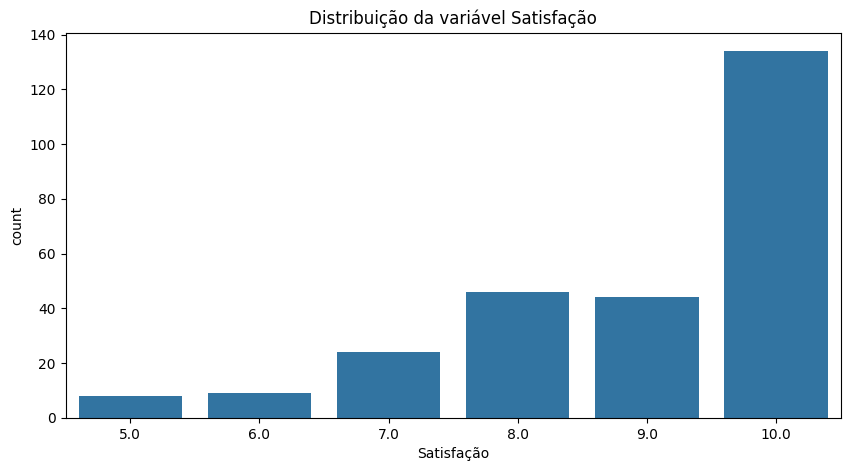

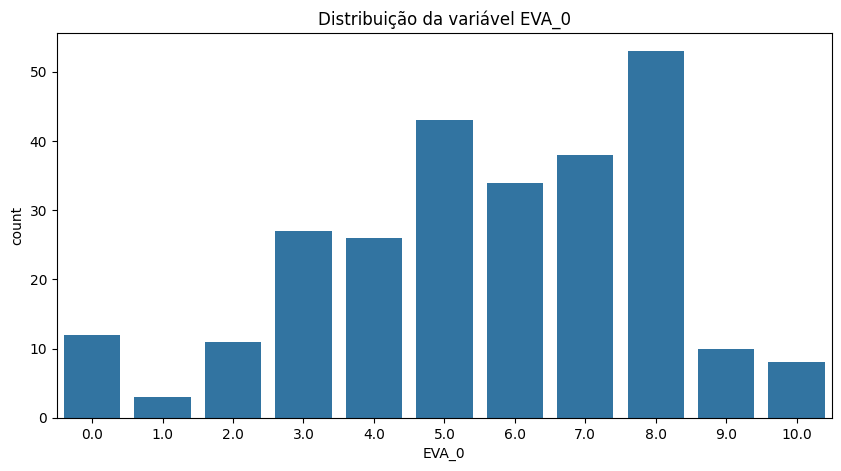

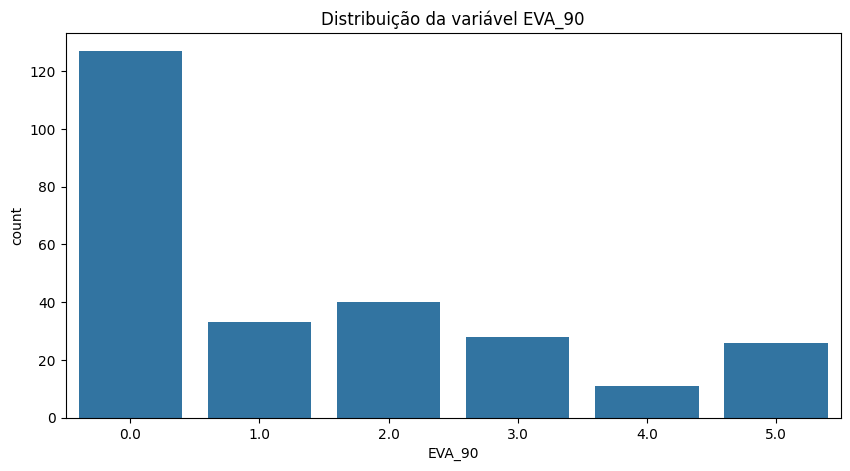

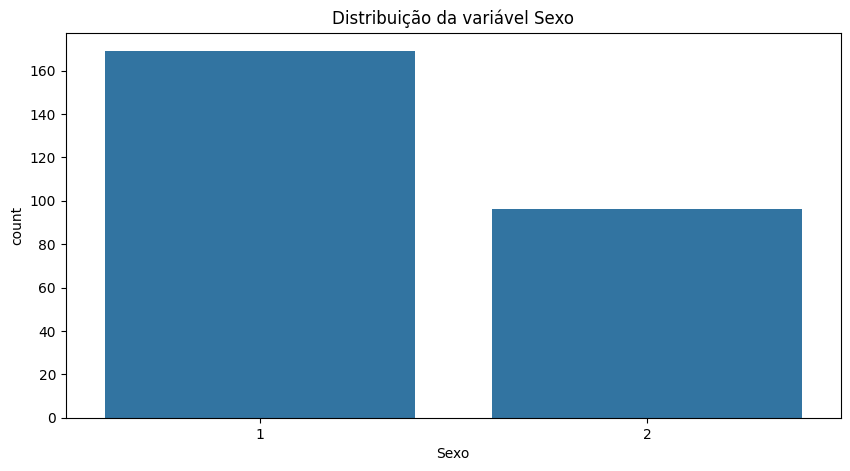

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Certificando-se de que estamos usando o DataFrame correto
#var_int = [f for f in df_orto.columns if df_orto.dtypes[f] == 'int64']
var_int = variaveis_ordinais+variaveis_categoricas
for i, var in enumerate(var_int): 
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura
    sns.countplot(x=df_orto[var])
    plt.title(f'Distribuição da variável {var}')  # Adiciona um título ao gráfico
    plt.show()  # Mostra o gráfico


In [39]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#for i, var in enumerate(var_num): 
#    plt.figure(i)
#    sns.histplot(df_orto3[var])
    

Index(['target', 'Idade ', 'Sexo', 'Peso', 'Altura_cm', 'IMC', 'Fle_0',
       'EVA_0', 'PM6_0', 'WD_0', 'WR_0', 'WAtotal_0', 'WT_0', 'Fle_90',
       'EVA_90', 'PM6_90', 'WD_90', 'WR_90', 'WAtotal_90', 'WT_90',
       'Satisfação'],
      dtype='object')
Peso


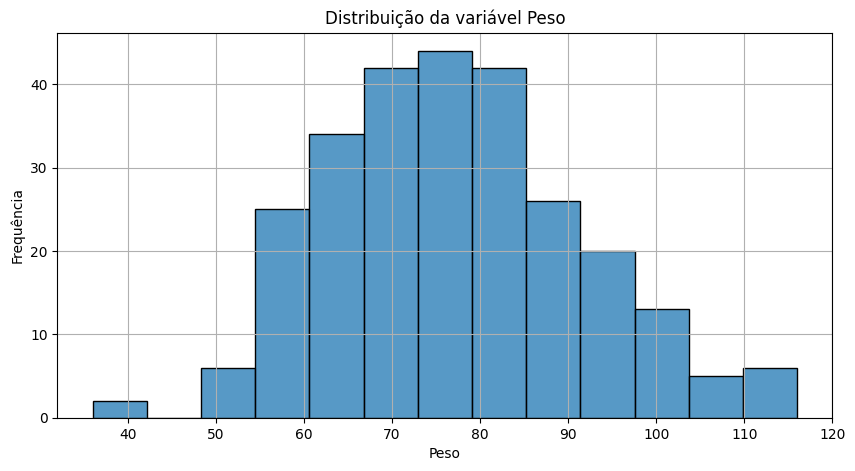

Altura_cm


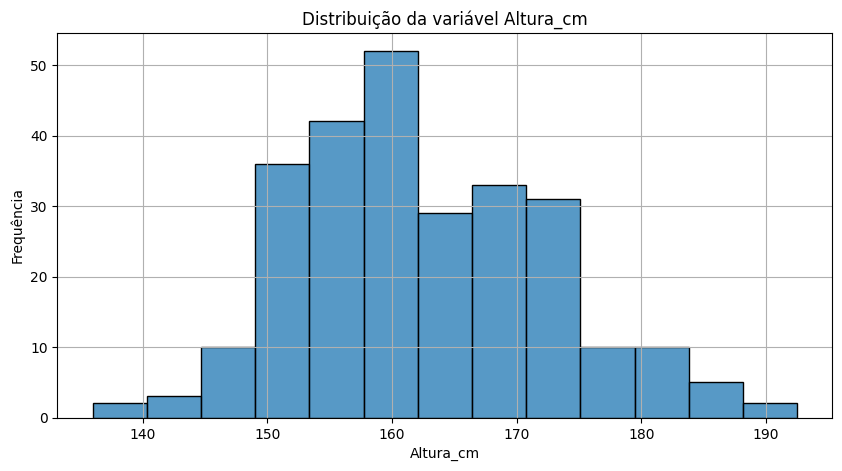

IMC


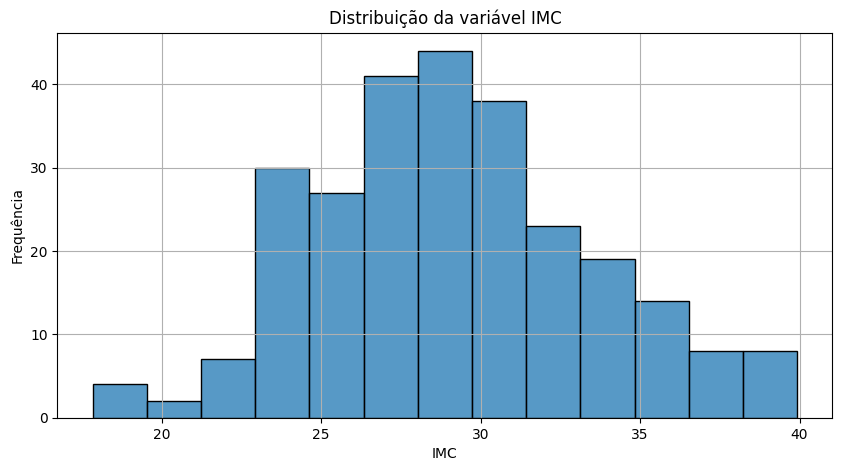

PM6_0


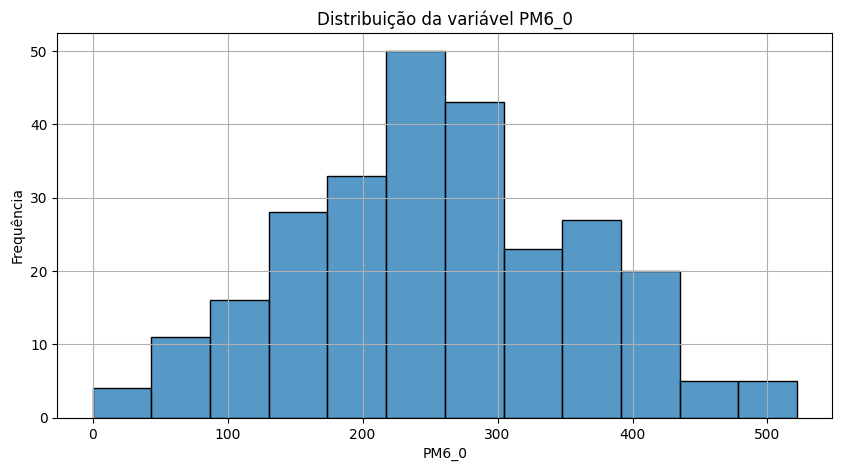

PM6_90


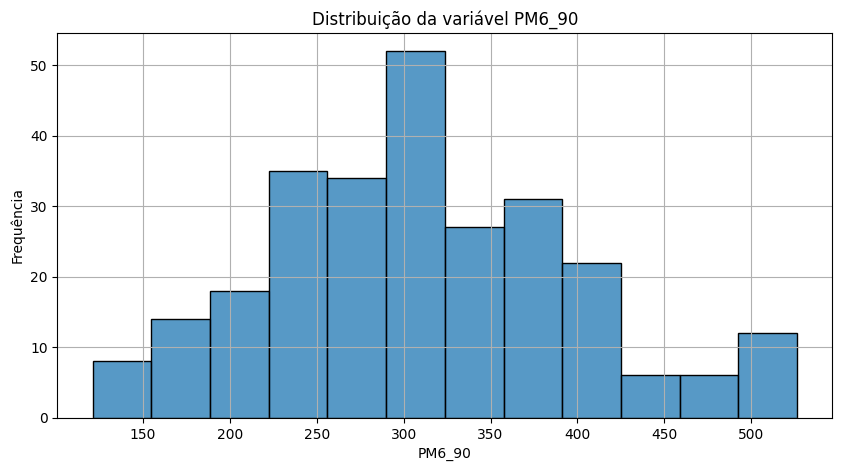

Fle_0


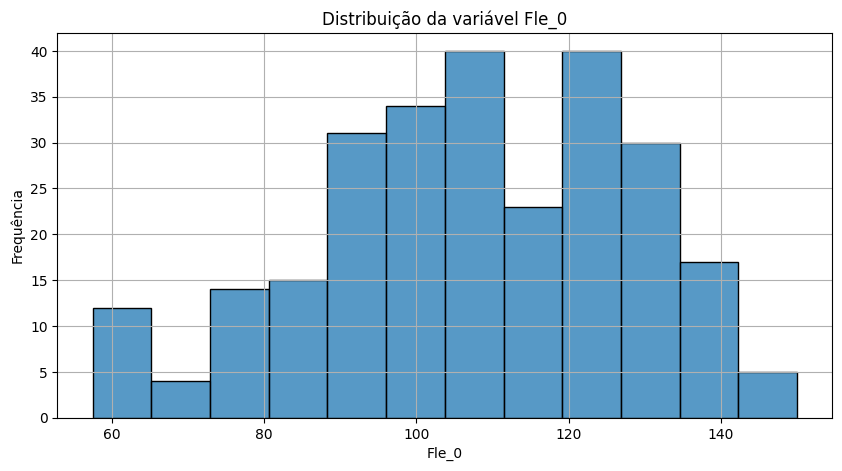

Fle_90


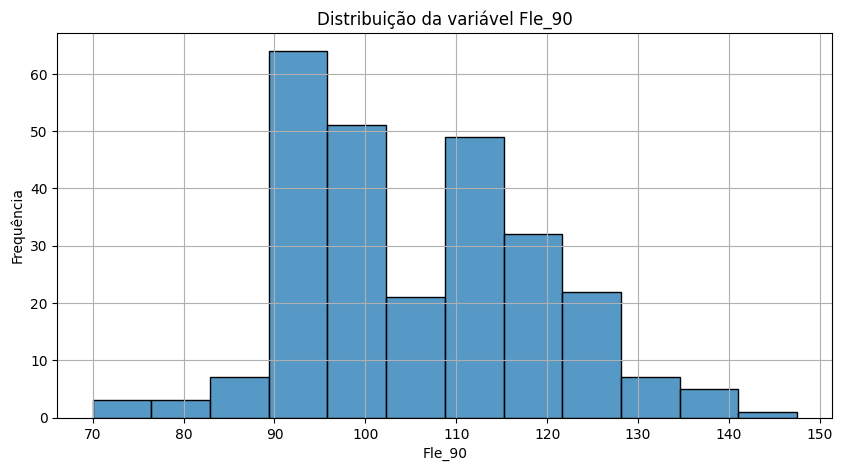

WAtotal_0


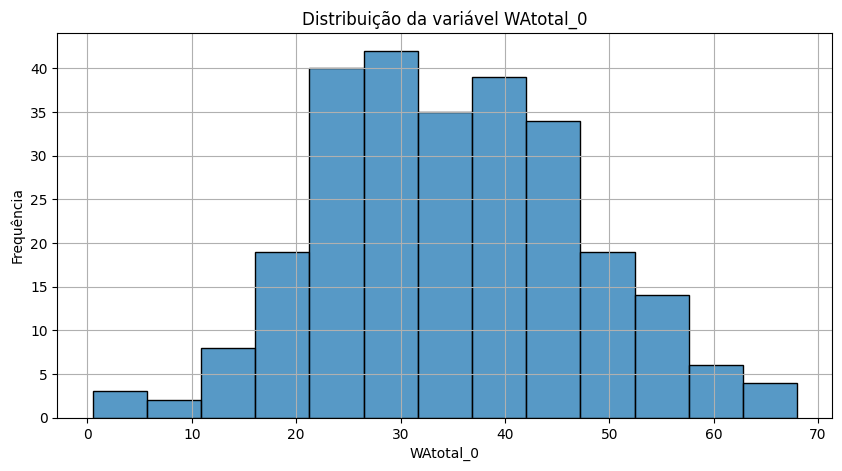

WAtotal_90


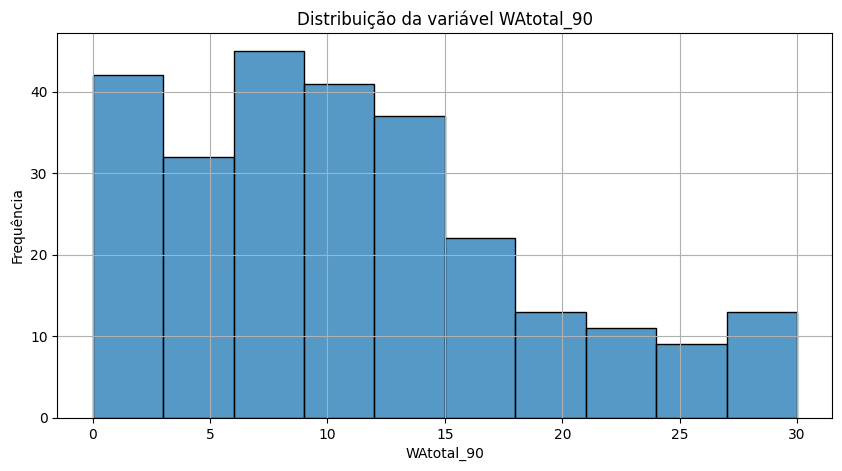

WD_0


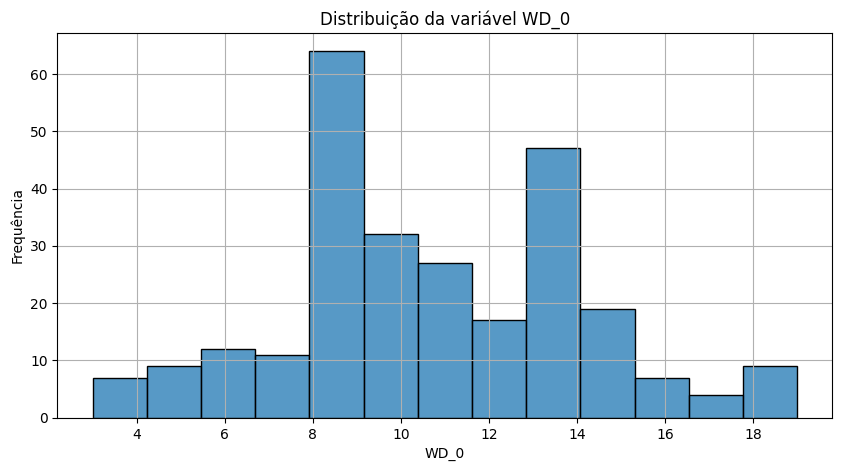

WD_90


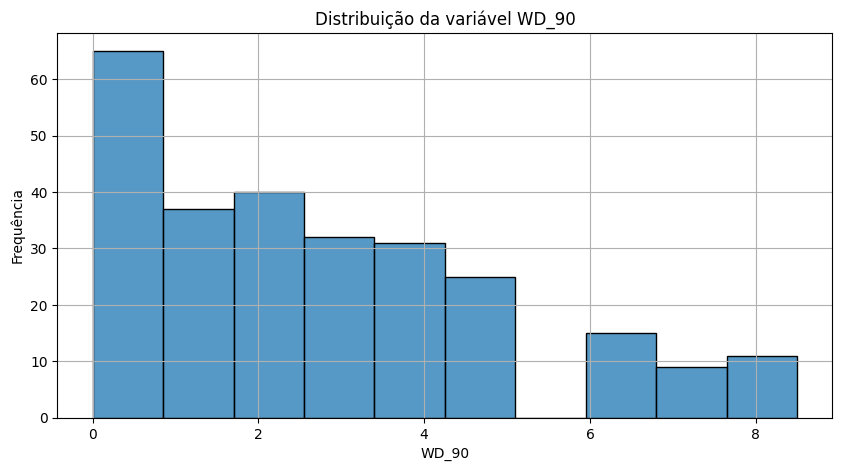

WR_0


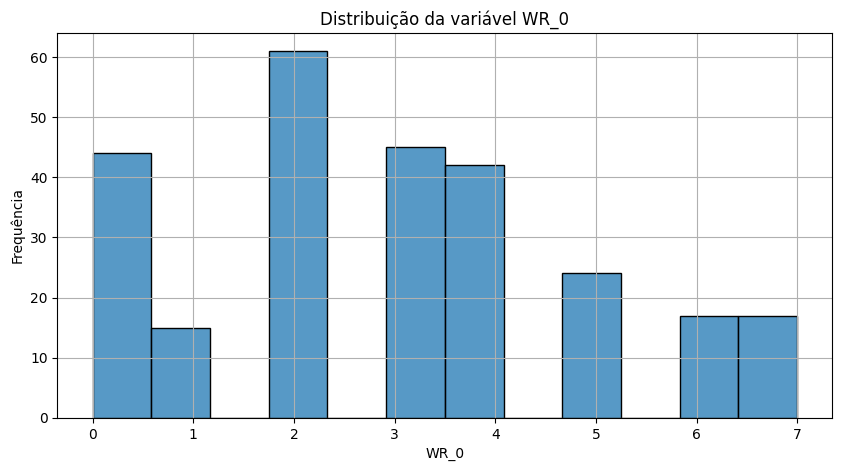

WR_90


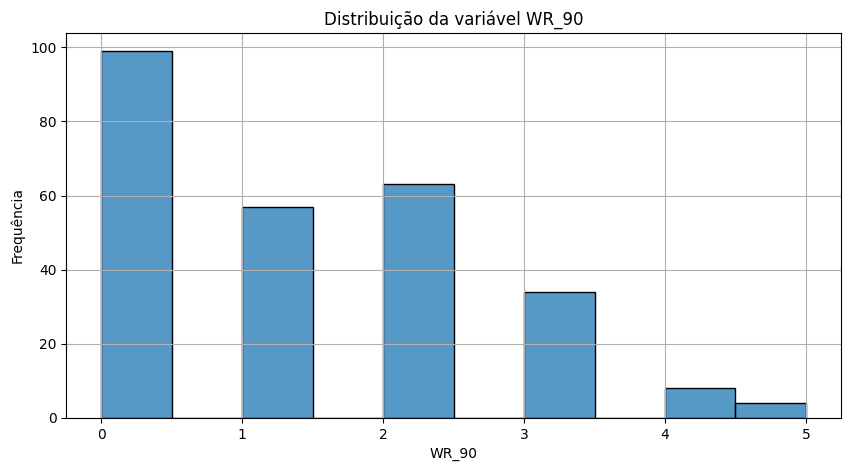

Idade 


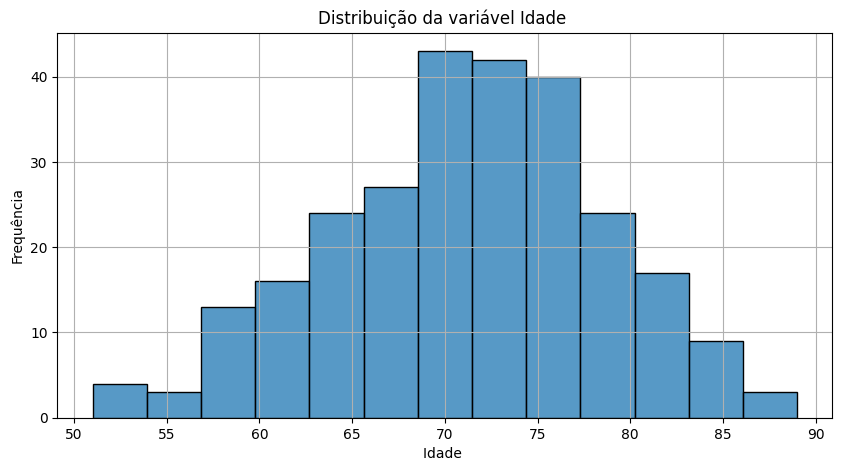

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df_orto3.columns)
# Supondo que var_num já foi definido e contém os nomes das variáveis contínuas
var_num=variaveis_continuas+variaveis_discretas
for i, var in enumerate(var_num): 
    print(var)
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura para uma melhor visualização
    sns.histplot(df_orto3[var])  # kde=True adiciona uma linha de densidade estimada
    plt.title(f'Distribuição da variável {var}')  # Adiciona um título ao histograma
    plt.xlabel(var)  # Adiciona rótulo ao eixo X
    plt.ylabel('Frequência')  # Adiciona rótulo ao eixo Y
    plt.grid(True)  # Adiciona linhas de grade para melhor leitura dos valores
    plt.show()  # Exibe o gráfico



In [41]:
df_orto.dtypes

target          int32
Idade         float64
Sexo            int64
Peso          float64
Altura_cm     float64
IMC           float64
Fle_0         float64
EVA_0         float64
PM6_0         float64
WD_0          float64
WR_0          float64
WAtotal_0     float64
WT_0            int64
Fle_90        float64
EVA_90        float64
PM6_90        float64
WD_90         float64
WR_90         float64
WAtotal_90    float64
WT_90           int64
Satisfação    float64
dtype: object

## 11. Analise bivariada

In [42]:
print("Variáveis Quantitativas (var_num):", var_num)
print("Variáveis Qualitativas (var_int):", var_int)

Variáveis Quantitativas (var_num): ['Peso', 'Altura_cm', 'IMC', 'PM6_0', 'PM6_90', 'Fle_0', 'Fle_90', 'WAtotal_0', 'WAtotal_90', 'WD_0', 'WD_90', 'WR_0', 'WR_90', 'Idade ']
Variáveis Qualitativas (var_int): ['Satisfação', 'EVA_0', 'EVA_90', 'Sexo']


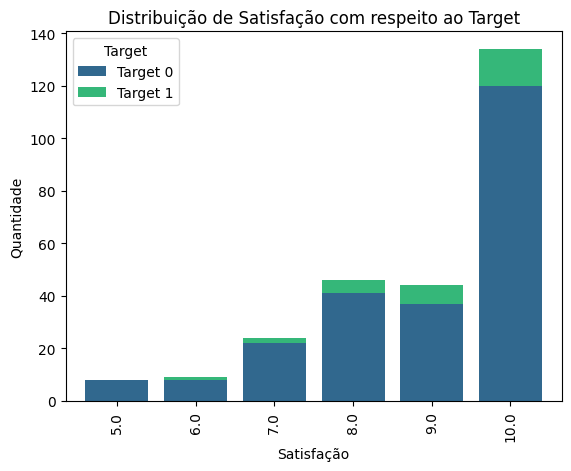

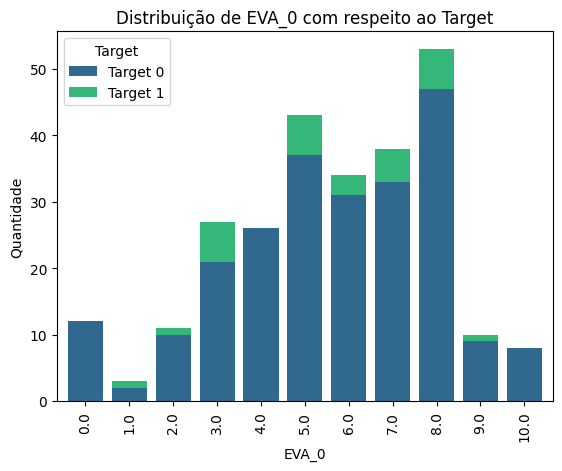

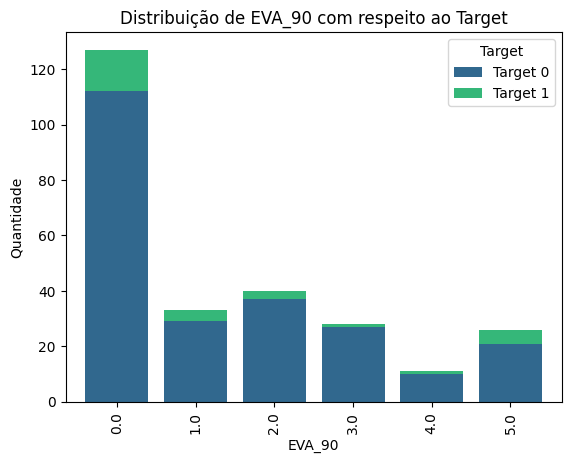

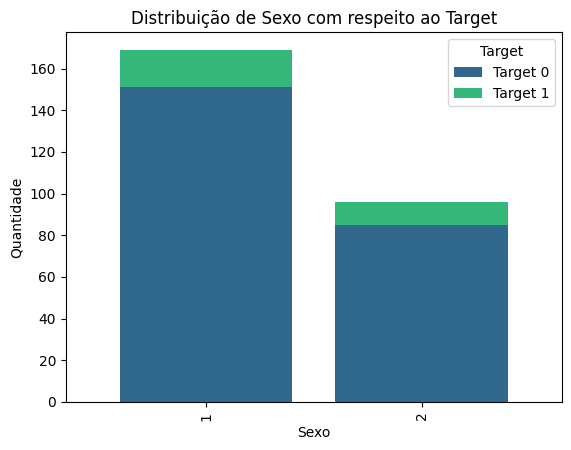

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assegurando que 'target' não está na lista
if 'target' in var_int:
    var_int.remove('target')

# Define uma paleta de cores usando Seaborn, apropriada para o número de categorias em 'target'
colors = sns.color_palette('viridis', n_colors=len(df_orto3['target'].unique()))

# Análise para variáveis qualitativas com 'viridis'
for col in var_int:
    df_crosstab = pd.crosstab(df_orto3[col], df_orto3['target'])
    ax = df_crosstab.plot(kind='bar', stacked=True, color=colors, width=0.8)  # Ajuste a largura aqui
    plt.title(f'Distribuição de {col} com respeito ao Target')
    plt.xlabel(col)
    plt.ylabel('Quantidade')
    plt.legend(title='Target', labels=['Target 0', 'Target 1'])  # Ajuste os rótulos conforme apropriado
    plt.show()


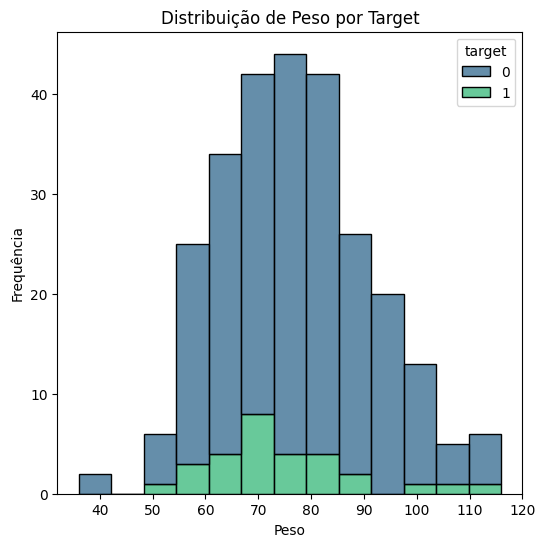

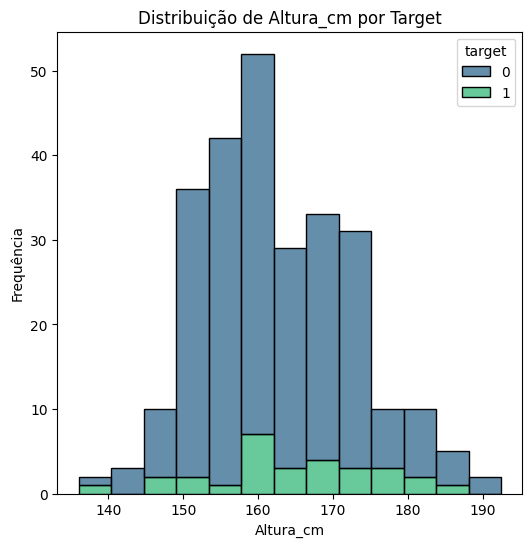

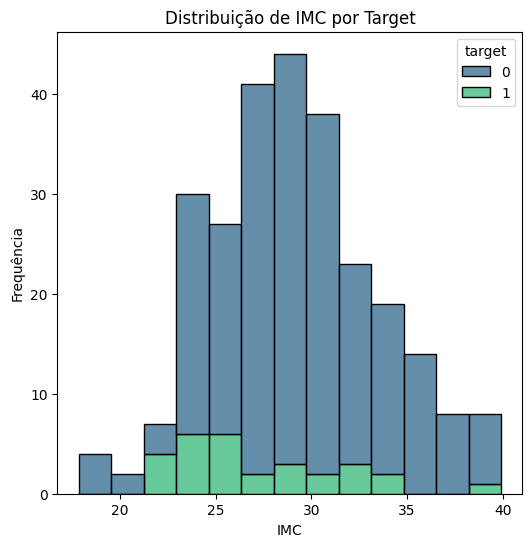

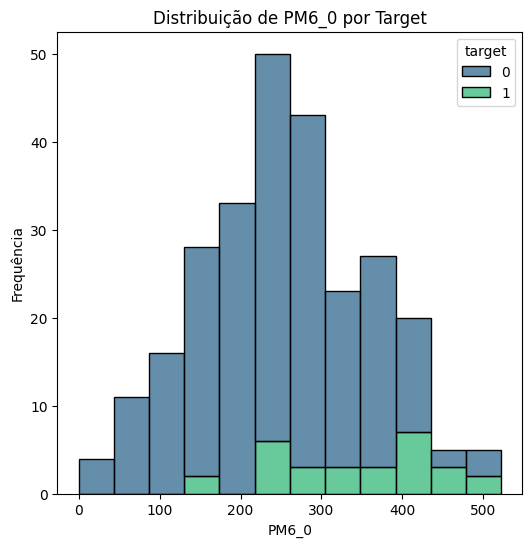

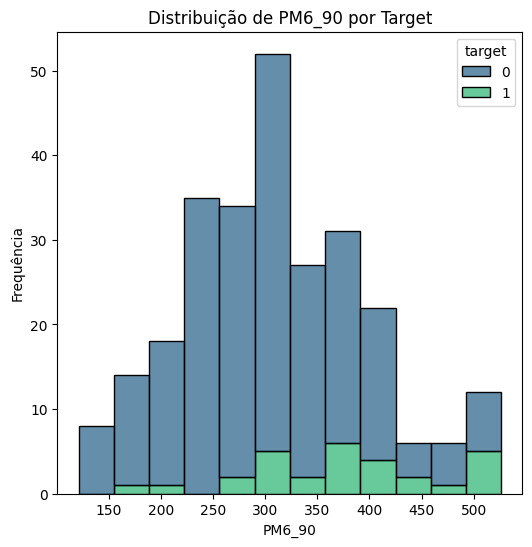

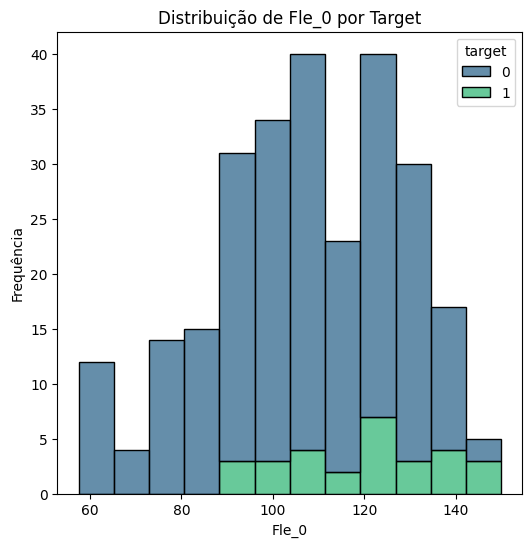

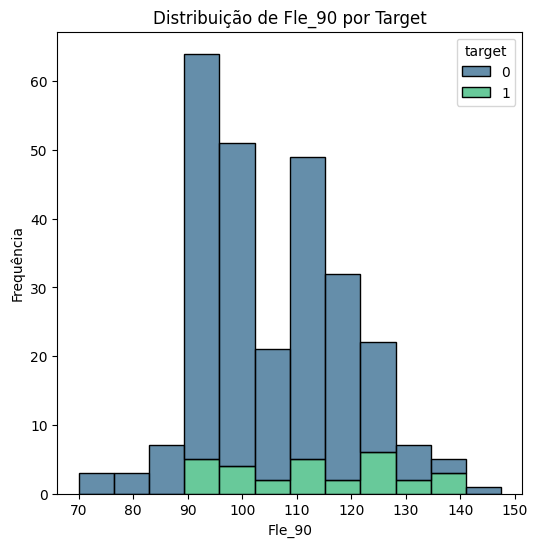

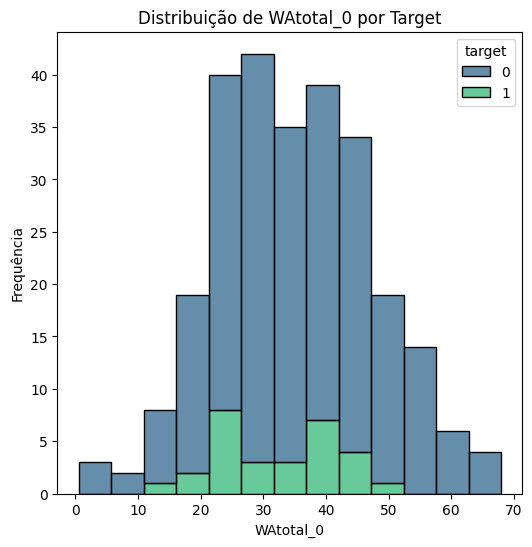

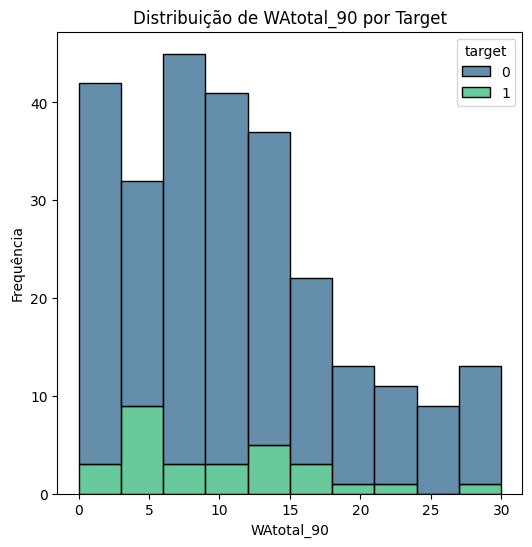

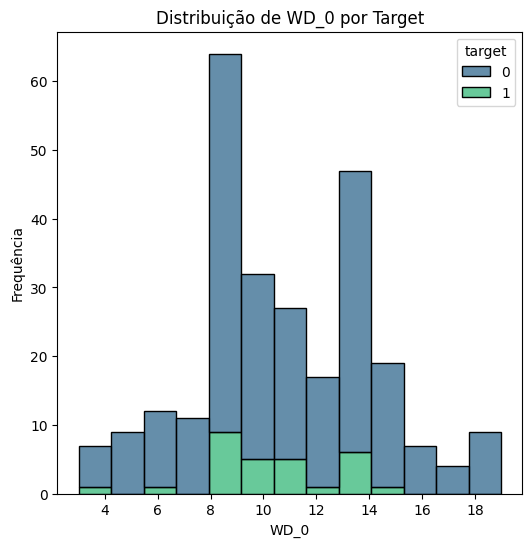

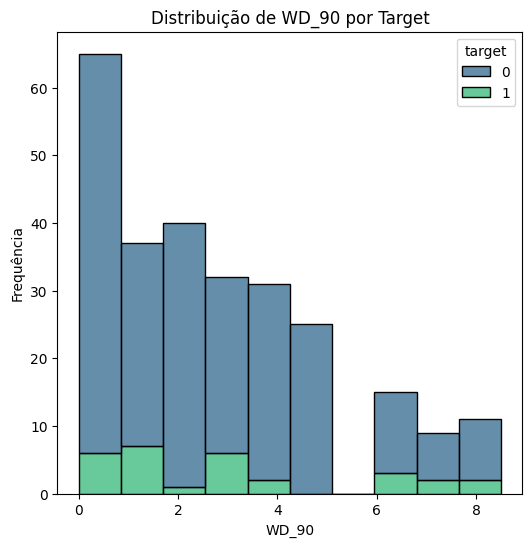

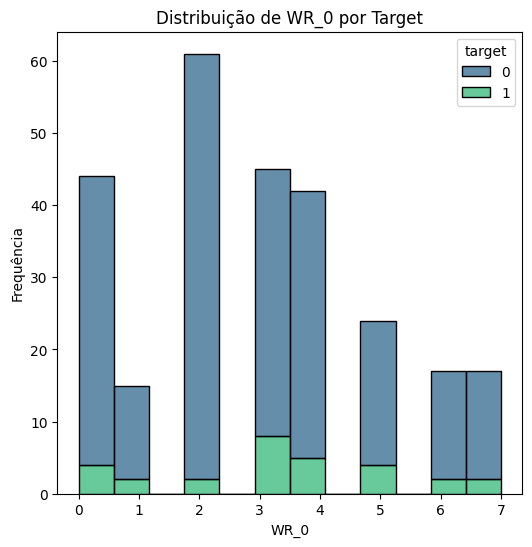

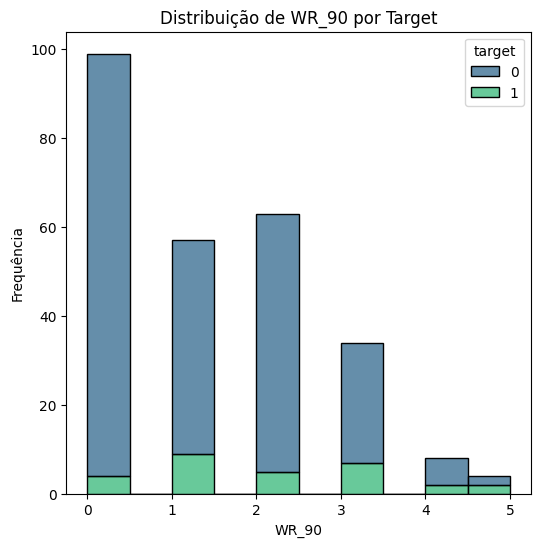

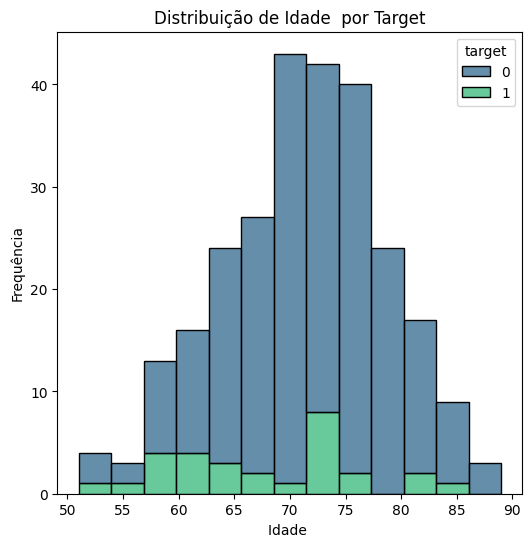

In [44]:
import seaborn as sns

# Análise para variáveis quantitativas
for var in var_num:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df_orto3, x=var, hue='target', multiple='stack', palette='viridis', edgecolor='black')
    plt.title(f'Distribuição de {var} por Target')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

In [45]:
#Remover a target das variáveis 
#var_int.remove('target')

In [46]:
# Analise gráfica variáveis 
#for col in var_int:
#    df_crosstab = pd.crosstab(df_orto3[col], df_orto3['target'])
#    df_crosstab.plot(kind='bar', stacked=True, color=['lightcoral', 'limegreen'])
#    plt.show()

## 12. Analise multivariada - correlação (remover variaveis correlacionadas)

In [47]:
#cálculo da correlação
df_orto3.corr(method='spearman')

,target,Idade,Sexo,Peso,Altura_cm,IMC,Fle_0,EVA_0,PM6_0,WD_0,...,WAtotal_0,WT_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,WT_90,Satisfação
target,1.000000,-0.146784,0.012432,-0.083706,0.103684,-0.154460,0.207391,-0.016198,0.260281,-0.030236,...,-0.069079,-0.045994,0.180185,-0.011523,0.254546,0.018406,0.186331,-0.053395,-0.017631,0.014142
Idade,-0.146784,1.000000,-0.011506,-0.181696,-0.161991,-0.117869,-0.101511,0.061940,-0.285604,-0.060725,...,0.074447,0.032352,-0.086046,0.073156,-0.337162,0.025161,-0.088947,0.153769,0.121704,-0.061296
Sexo,0.012432,-0.011506,1.000000,0.408031,0.674140,-0.029044,0.204158,-0.162416,0.293916,-0.141074,...,-0.160215,-0.168048,0.123720,-0.127665,0.294724,-0.100056,0.041462,-0.071518,-0.074098,-0.039727
Peso,-0.083706,-0.181696,0.408031,1.000000,0.550463,0.744383,0.019043,-0.067739,0.204056,0.008740,...,0.004915,0.003668,-0.035423,-0.055686,0.099846,0.007435,0.072512,0.079486,0.059633,-0.071800
Altura_cm,0.103684,-0.161991,0.674140,0.550463,1.000000,-0.097971,0.115799,-0.164304,0.394506,-0.082659,...,-0.146515,-0.126638,0.157716,-0.099503,0.346832,-0.127276,0.093950,-0.091065,-0.102827,-0.078559
IMC,-0.154460,-0.117869,-0.029044,0.744383,-0.097971,1.000000,-0.070935,0.059701,-0.066270,0.076244,...,0.119009,0.106851,-0.184518,0.034033,-0.152155,0.122417,0.046397,0.187811,0.174386,-0.029599
Fle_0,0.207391,-0.101511,0.204158,0.019043,0.115799,-0.070935,1.000000,-0.274192,0.329168,-0.244834,...,-0.324753,-0.339086,0.233017,-0.066415,0.138729,-0.001299,0.057390,0.049895,0.058590,-0.035843
EVA_0,-0.016198,0.061940,-0.162416,-0.067739,-0.164304,0.059701,-0.274192,1.000000,-0.373052,0.484487,...,0.503354,0.527840,-0.083700,0.117623,-0.116774,0.060641,-0.087783,0.032556,0.020544,0.093619
PM6_0,0.260281,-0.285604,0.293916,0.204056,0.394506,-0.066270,0.329168,-0.373052,1.000000,-0.296206,...,-0.379052,-0.365065,0.196896,-0.088217,0.547995,-0.006489,0.187531,-0.175484,-0.112068,-0.059348
WD_0,-0.030236,-0.060725,-0.141074,0.008740,-0.082659,0.076244,-0.244834,0.484487,-0.296206,1.000000,...,0.686614,0.777303,-0.040272,0.251208,-0.023706,0.168660,-0.072959,0.111861,0.101112,-0.003759


<Axes: >

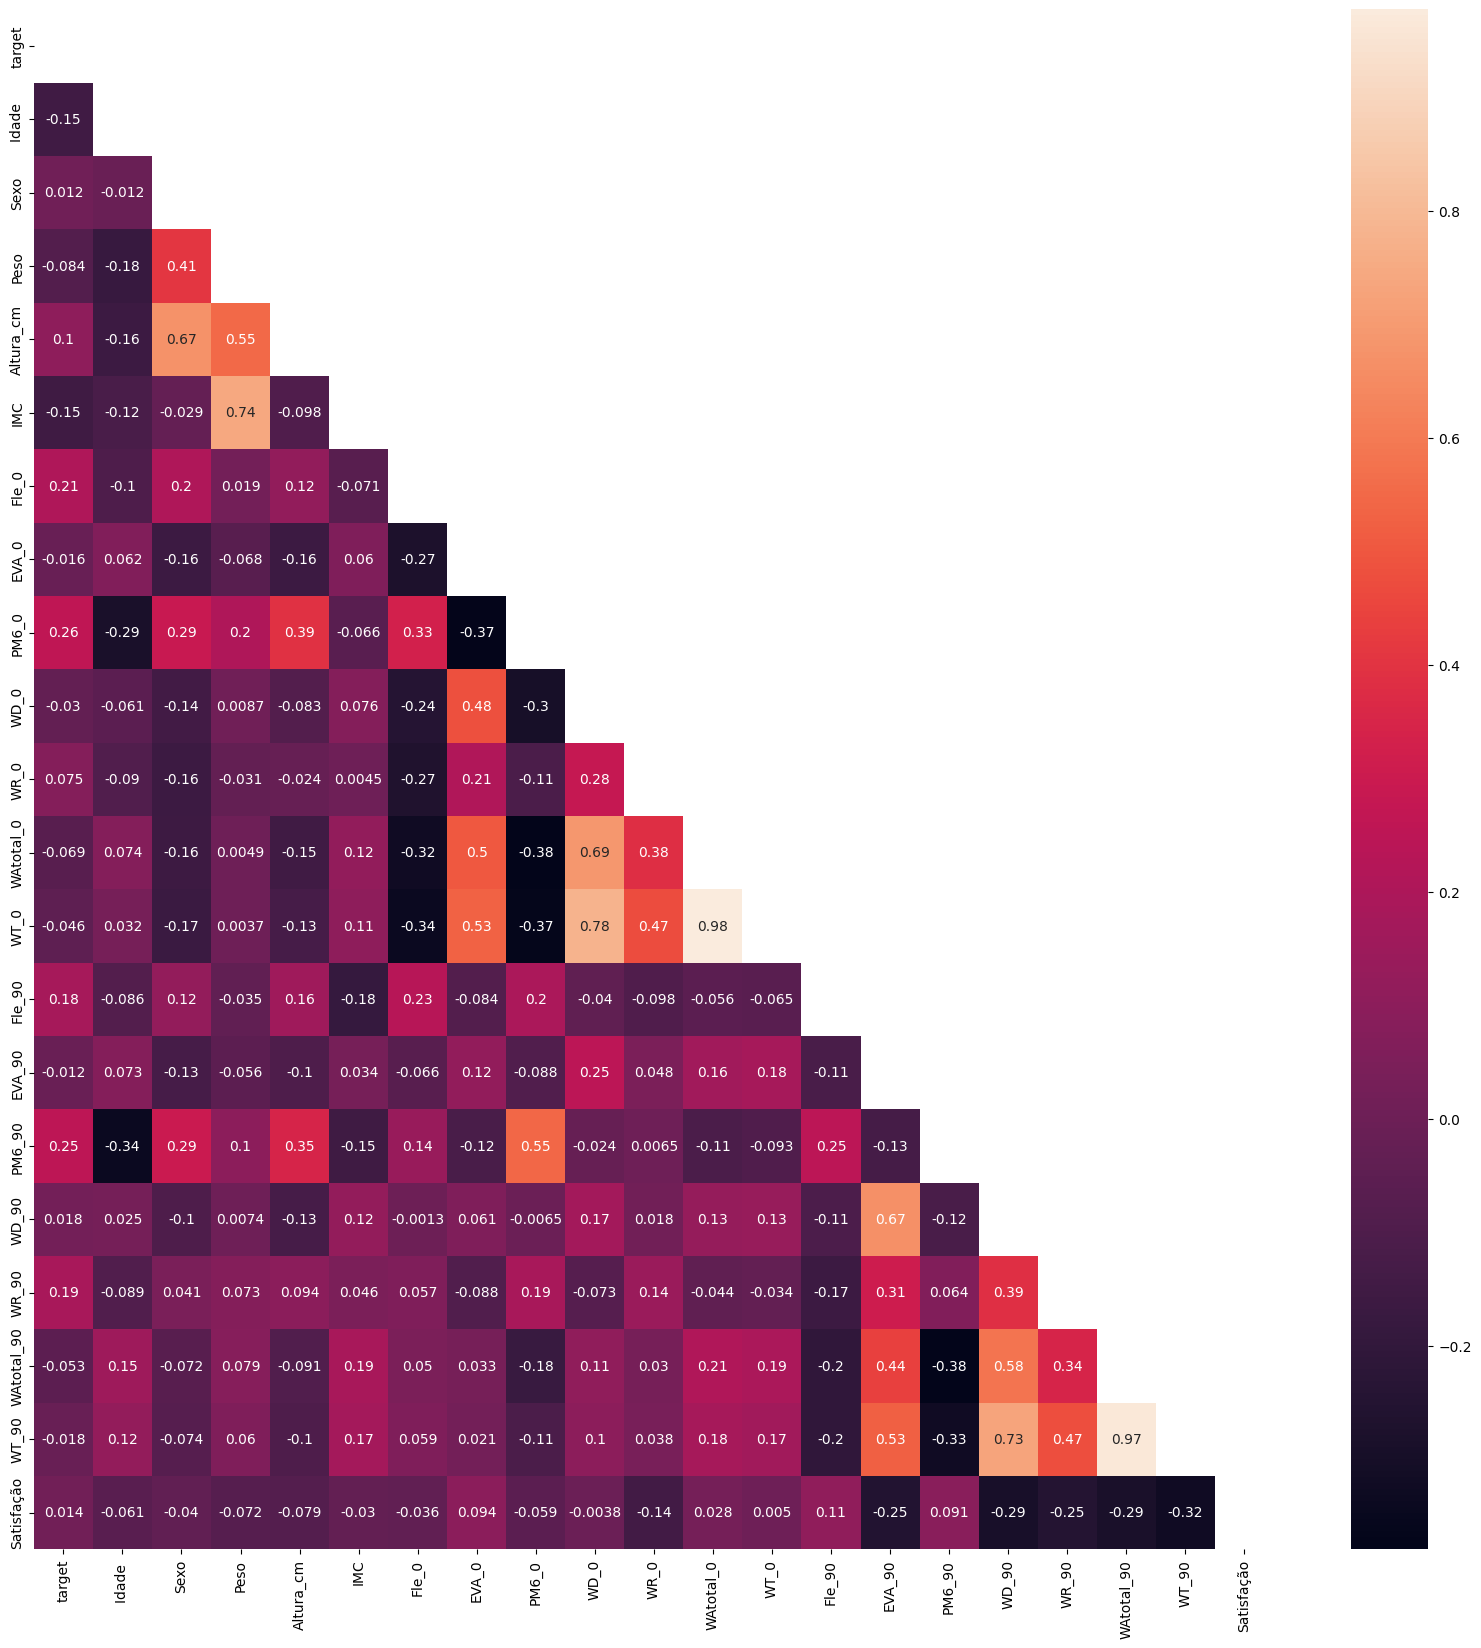

In [48]:
#Visualização gráfica
matrix = np.triu(df_orto3.corr(method="spearman"))

plt.figure(figsize=(20,20))
sns.heatmap(df_orto3.corr(method="spearman"), annot=True, mask=matrix)

In [49]:
#Correlações positivas muito fortes --> WAtotal_0 vs WT_90; WAtotal_90 vs WT_0

In [50]:
#Spearman
corr_matrix_abs=df_orto3.corr(method="spearman").abs()
s = corr_matrix_abs.unstack().sort_values(ascending=False)
lst_corr_cont70 = pd.Series(s).where(lambda x : (s>=0.7) & (s<1)).dropna()
lst_corr_cont70=lst_corr_cont70.reset_index()
lst_corr_cont70=lst_corr_cont70.rename(columns={0:'Corr_Spearman'})
lst_corr_cont70

,level_0,level_1,Corr_Spearman
0,WAtotal_0,WT_0,0.977849
1,WT_0,WAtotal_0,0.977849
2,WT_90,WAtotal_90,0.965177
3,WAtotal_90,WT_90,0.965177
4,WD_0,WT_0,0.777303
5,WT_0,WD_0,0.777303
6,Peso,IMC,0.744383
7,IMC,Peso,0.744383
8,WT_90,WD_90,0.730253
9,WD_90,WT_90,0.730253


In [51]:
#Pearson
#Criar uma tabela com as correlações acima de 0.7
corr_matrix_abs = df_orto3.corr().abs()
s = corr_matrix_abs.unstack().sort_values(ascending=False)
lst_corr_cont70 = pd.Series(s).where(lambda x : (s>0.7) & (s<1)).dropna()
lst_corr_cont70=lst_corr_cont70.reset_index()
lst_corr_cont70=lst_corr_cont70.rename(columns={0:'Corr_Pearson'})
lst_corr_cont70

,level_0,level_1,Corr_Pearson
0,WAtotal_0,WT_0,0.978113
1,WT_0,WAtotal_0,0.978113
2,WT_90,WAtotal_90,0.964167
3,WAtotal_90,WT_90,0.964167
4,WT_0,WD_0,0.807959
5,WD_0,WT_0,0.807959
6,WT_90,WD_90,0.767937
7,WD_90,WT_90,0.767937
8,IMC,Peso,0.736511
9,Peso,IMC,0.736511


<Axes: >

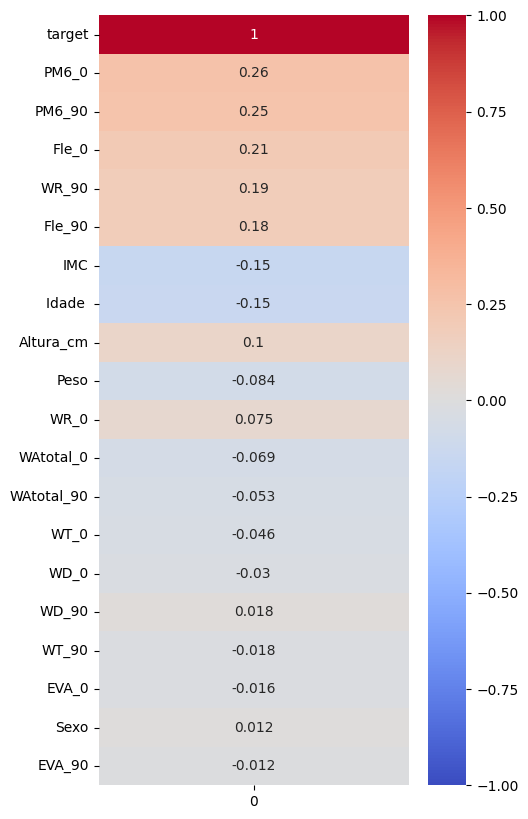

In [52]:
#Correlação com a target
correlations=df_orto3.corrwith(df_orto3['target'], method='spearman').iloc[:-1].to_frame()
correlations['abs']=correlations[0].abs()
sorted_correlations=correlations.sort_values('abs', ascending=False)[0]

fig, ax= plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)

In [53]:
#correlações com a target mais fracas entre os pares correlacionados --> 1º WT_0; 2º WT_90

In [54]:
#Remover colunas correlacionadas:
df_orto3 = df_orto3.drop(['WT_0','WT_90'],axis=1)

<Axes: >

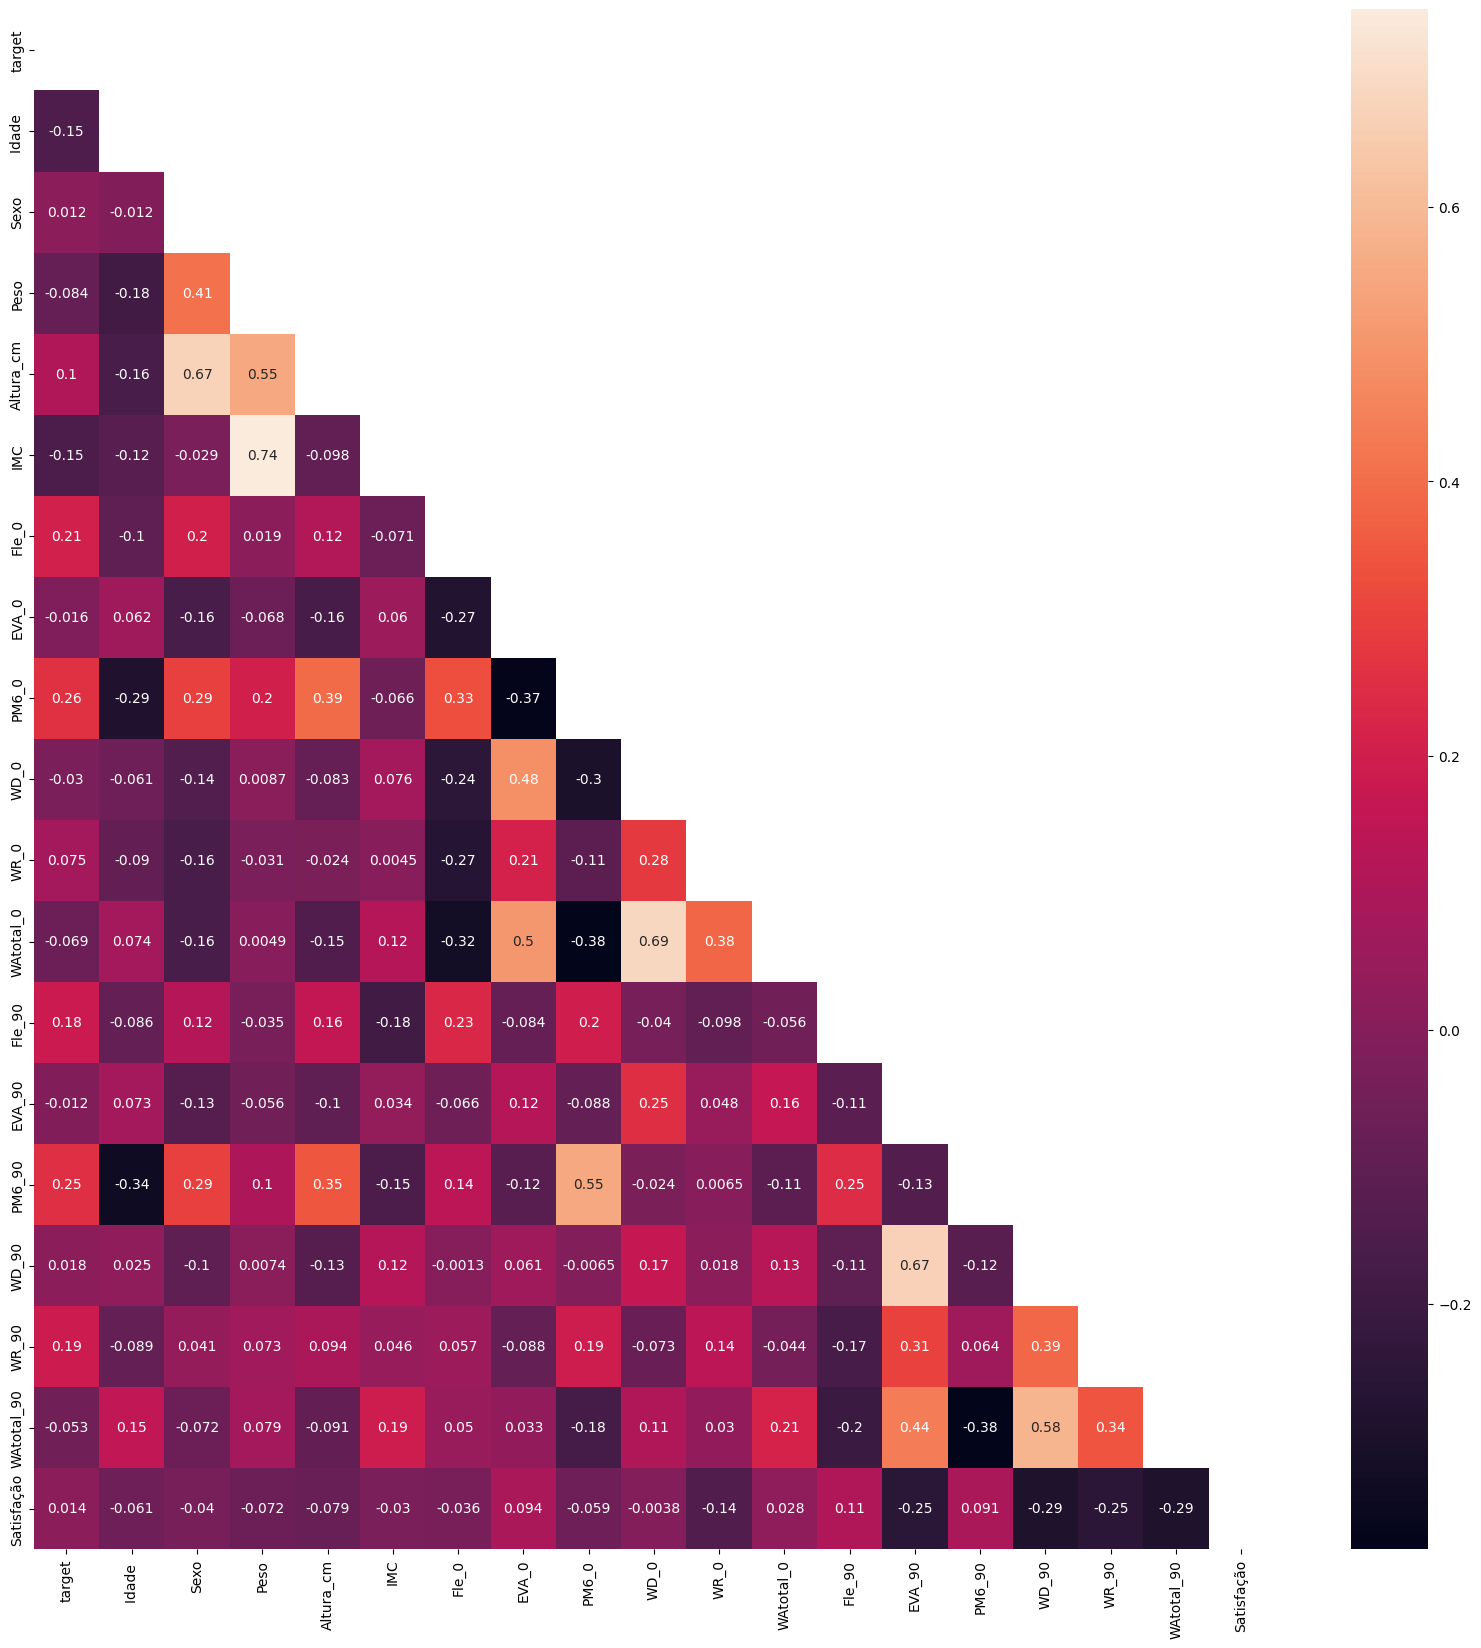

In [55]:
matrix = np.triu(df_orto3.corr(method="spearman"))

plt.figure(figsize=(20,20))
sns.heatmap(df_orto3.corr(method="spearman"), annot=True, mask=matrix)



## Output (df_orto_cleaned)

In [56]:

for var in df_orto3.columns:
    if var in var_int_save: 
        df_orto3[var] = df_orto3[var].astype(int)  # Converte para int e mantém como int

df_orto_cleaned = df_orto3
df_orto_cleaned

,target,Idade,Sexo,Peso,Altura_cm,IMC,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,Satisfação
0,0,67,1,80.0,158.0,32.046146,86.0,4.0,324.0,15,6,54.0,80.0,1.0,290.0,5,1,9,8.0
1,0,76,2,60.0,155.0,24.973985,90.0,4.0,357.0,14,7,39.0,110.0,1.0,480.0,5,4,3,9.0
2,0,72,2,93.0,182.0,28.076319,57.5,10.0,289.0,15,4,53.0,100.0,0.0,388.0,0,0,0,10.0
3,0,67,2,71.0,163.0,26.722873,127.0,2.0,390.0,3,1,16.0,100.0,0.0,387.0,2,0,10,9.0
4,0,66,1,49.0,160.0,19.140625,120.0,0.0,285.0,3,0,8.0,125.0,1.0,284.0,0,1,2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,73,1,71.0,153.0,30.330215,92.0,8.0,220.0,11,5,41.0,115.0,1.0,340.0,1,1,16,10.0
261,1,77,2,63.0,161.0,24.304618,130.0,7.0,160.0,13,2,44.0,110.0,0.0,280.0,0,1,6,10.0
262,0,76,1,65.0,155.0,27.055151,80.0,9.0,60.0,15,7,46.0,87.0,1.0,240.0,1,2,9,10.0
263,0,70,1,54.0,169.0,18.906901,95.0,7.0,420.0,7,3,24.0,100.0,0.0,526.5,0,2,4,10.0


# Modelling

Aqui iremos:

0. Separação de target e features (df_orto_y, df_orto_X)
1. Fazer undersampling (df_orto_under)
2. Fazer oversampling (df_orto_over)
3. Criação dos datasets 70/30 (treino e teste):
    1. Para o dataframe original (df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
    2. Para o dataframe undersampling (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)
    3. Para o dataframe oversampling (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)
4. Aplicação dos modelos e gerar dados de classificação:
    1. Random Forest
        1. Para o dataframe original 
            1. Split 70/30 
            2. Cross-Validation
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
    2. Decision Tree
        1. Para o dataframe original 
            1. Split 70/30
            2. Cross-Validation
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
    3. Regressão Logistica
        1. Para o dataframe original
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
    4. Outros...(Optional)
        1. Para o dataframe original
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        2. Para o dataframe undersampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv
        3. Para o dataframe oversampling 
            1. Split 70/30
            2. Cross-Validation
            3. Exportação de dados de classificação para Excel ou csv



## 0. Separação de target e features

In [57]:
#Dataset original
df_orto_X = df_orto_cleaned.drop('target', axis=1)
df_orto_y = df_orto_cleaned['target']
print(print(df_orto_cleaned['target'].value_counts()))
print(print(df_orto_cleaned['target'].value_counts(normalize=True)))
print(df_orto_y.head(10))
df_orto_X.head(10)


target
0    236
1     29
Name: count, dtype: int64
None
target
0    0.890566
1    0.109434
Name: proportion, dtype: float64
None
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32


,Idade,Sexo,Peso,Altura_cm,IMC,Fle_0,EVA_0,PM6_0,WD_0,WR_0,WAtotal_0,Fle_90,EVA_90,PM6_90,WD_90,WR_90,WAtotal_90,Satisfação
0,67,1,80.0,158.0,32.046146,86.0,4.0,324.0,15,6,54.0,80.0,1.0,290.0,5,1,9,8.0
1,76,2,60.0,155.0,24.973985,90.0,4.0,357.0,14,7,39.0,110.0,1.0,480.0,5,4,3,9.0
2,72,2,93.0,182.0,28.076319,57.5,10.0,289.0,15,4,53.0,100.0,0.0,388.0,0,0,0,10.0
3,67,2,71.0,163.0,26.722873,127.0,2.0,390.0,3,1,16.0,100.0,0.0,387.0,2,0,10,9.0
4,66,1,49.0,160.0,19.140625,120.0,0.0,285.0,3,0,8.0,125.0,1.0,284.0,0,1,2,7.0
5,81,2,66.0,160.0,25.781250,82.0,4.0,135.0,9,3,26.0,85.0,1.0,242.0,2,1,6,9.0
6,72,1,63.0,162.0,24.005487,95.0,1.0,366.0,13,5,0.5,100.0,1.0,392.0,4,0,7,8.0
7,76,1,56.0,148.0,25.566107,65.0,9.0,249.0,14,6,43.0,75.0,1.0,262.0,2,1,7,7.0
8,81,1,81.0,162.0,30.864198,80.0,2.0,180.0,14,4,55.0,70.0,2.0,190.0,1,1,11,9.0
9,73,1,80.0,170.0,27.681661,95.0,0.0,501.0,11,4,44.0,114.0,0.0,424.0,0,0,2,9.0


In [58]:
# Verificar se ainda existem valores ausentes em df_orto_X
print(df_orto_X.isnull().sum())

# Verificar se existem valores ausentes em df_orto_y
print(df_orto_y.isnull().sum())


Idade         0
Sexo          0
Peso          0
Altura_cm     0
IMC           0
Fle_0         0
EVA_0         0
PM6_0         0
WD_0          0
WR_0          0
WAtotal_0     0
Fle_90        0
EVA_90        0
PM6_90        0
WD_90         0
WR_90         0
WAtotal_90    0
Satisfação    0
dtype: int64
0


## 1. Fazer undersampling (df_orto_under)

In [59]:
#Undersampling: criar dataset - 70% target 0, 30% target 1, não se faz uma diferença mais proxima de 50/50 por haver poucos dados

from imblearn.under_sampling import RandomUnderSampler
# Contagem original das classes
num_target_0_orig = df_orto_cleaned['target'].value_counts().to_dict()[0]
num_target_1_orig = df_orto_cleaned['target'].value_counts().to_dict()[1]
# Proporção desejada
prop_target_0_desired = 0.7
prop_target_1_desired = 0.3
# Calcula o número de instâncias desejadas para cada classe
num_target_0_under = int(num_target_1_orig * (prop_target_0_desired / prop_target_1_desired))
num_target_1_under = num_target_1_orig
# Criando o objeto RandomUnderSampler com a estratégia de amostragem desejada
rus = RandomUnderSampler(sampling_strategy={0: num_target_0_under, 1: num_target_1_under}, random_state=42)
# Aplicando o undersampling aos dados
df_orto_under_X, df_orto_under_y = rus.fit_resample(df_orto_X, df_orto_y)
# Verificando as proporções resultantes
df_orto_under_y.value_counts(normalize=True)


target
0    0.697917
1    0.302083
Name: proportion, dtype: float64

## 2. Fazer oversampling (df_orto_over)

In [60]:
print(df_orto_X.dtypes)

Idade           int32
Sexo            int32
Peso          float64
Altura_cm     float64
IMC           float64
Fle_0         float64
EVA_0         float64
PM6_0         float64
WD_0            int32
WR_0            int32
WAtotal_0     float64
Fle_90        float64
EVA_90        float64
PM6_90        float64
WD_90           int32
WR_90           int32
WAtotal_90      int32
Satisfação    float64
dtype: object


In [61]:
#pip install -U scikit-learn imbalanced-learn

In [62]:
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Verificar e tratar NaNs e infinitos em df_orto_X
if df_orto_X.isnull().any().any() or np.isinf(df_orto_X).any().any():
    print("NaNs or infinities detected in df_orto_X. Applying imputation.")
    # Aplicar imputação
    imputer = SimpleImputer(strategy='median')
    df_orto_X = pd.DataFrame(imputer.fit_transform(df_orto_X), columns=df_orto_X.columns)

# Proporção desejada para oversampling
num_target_0_orig = df_orto_y.value_counts()[0]
num_target_1_orig = df_orto_y.value_counts()[1]
prop_target_0_desired = 0.6
prop_target_1_desired = 0.4
num_target_1_over = int(num_target_0_orig * (prop_target_1_desired / prop_target_0_desired))

# Configuração do SMOTE
smote_os = SMOTE(sampling_strategy={0: num_target_0_orig, 1: num_target_1_over}, random_state=42)

# Aplicando o oversampling aos dados
df_orto_over_X, df_orto_over_y = smote_os.fit_resample(df_orto_X, df_orto_y)

# Verificando as proporções resultantes
print(df_orto_over_y.value_counts(normalize=True))


target
0    0.600509
1    0.399491
Name: proportion, dtype: float64


## 3. Criação dos datasets 70/30:

### 3.1. Para o dataframe original (df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)

In [63]:
#Criar dataset treino e de teste
from sklearn.model_selection import train_test_split

df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test = train_test_split(df_orto_X, df_orto_y, test_size=0.30, random_state=42)

print("Distribuição da Target - Treino")
print("N. observações Treino", len(df_orto_X_train))
print(df_orto_y_train.value_counts(normalize=True))

print("Distribuição da Target - Teste")
print("N. observações Teste", len(df_orto_X_test))
print(df_orto_y_test.value_counts(normalize=True))

Distribuição da Target - Treino
N. observações Treino 185
target
0    0.902703
1    0.097297
Name: proportion, dtype: float64
Distribuição da Target - Teste
N. observações Teste 80
target
0    0.8625
1    0.1375
Name: proportion, dtype: float64


### 3.2. Para o dataframe undersampling (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)

In [64]:
#Criar dataset treino e de teste
from sklearn.model_selection import train_test_split

df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test = train_test_split(df_orto_under_X, df_orto_under_y, test_size=0.30, random_state=42)

print("Distribuição da Target - Treino")
print("N. observações Treino", len(df_orto_under_X_train))
print(df_orto_under_y_train.value_counts(normalize=True))

print("Distribuição da Target - Teste")
print("N. observações Teste", len(df_orto_under_X_test))
print(df_orto_under_y_test.value_counts(normalize=True))

Distribuição da Target - Treino
N. observações Treino 67
target
0    0.716418
1    0.283582
Name: proportion, dtype: float64
Distribuição da Target - Teste
N. observações Teste 29
target
0    0.655172
1    0.344828
Name: proportion, dtype: float64


### 3.3. Para o dataframe oversampling (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)

In [65]:
#Criar dataset treino e de teste
from sklearn.model_selection import train_test_split

df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test = train_test_split(df_orto_over_X, df_orto_over_y, test_size=0.30, random_state=42)

print("Distribuição da Target - Treino")
print("N. observações Treino", len(df_orto_over_X_train))
print(df_orto_over_y_train.value_counts(normalize=True))

print("Distribuição da Target - Teste")
print("N. observações Teste", len(df_orto_over_X_test))
print(df_orto_over_y_test.value_counts(normalize=True))

Distribuição da Target - Treino
N. observações Treino 275
target
0    0.592727
1    0.407273
Name: proportion, dtype: float64
Distribuição da Target - Teste
N. observações Teste 118
target
0    0.618644
1    0.381356
Name: proportion, dtype: float64


## 4. Aplicação dos modelos e gerar dados de classificação:

In [66]:
# Bibliotecas modelos de machine learning
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1. Random Forest

#### 4.1.1. Para o dataframe original 

##### 4.1.1.1. Split 70/30

In [67]:
#(df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
# Aplicar modelo
clf_RF_df_orto_70_30 = RandomForestClassifier(random_state=42)
clf_RF_df_orto_70_30.fit(df_orto_X_train, df_orto_y_train)

# Fazer previsões
y_pred_RF_df_orto_70_30 = clf_RF_df_orto_70_30.predict(df_orto_X_test)

# Obter matriz de confusão
conf_mtx_RF_df_orto_70_30 = confusion_matrix(df_orto_y_test, y_pred_RF_df_orto_70_30)
print("Matriz de Confusão:")
print(conf_mtx_RF_df_orto_70_30)

# Avaliação/Métricas do RandomForest - com 4 casas decimais
report_RF_df_orto_70_30 = classification_report(df_orto_y_test, y_pred_RF_df_orto_70_30, digits=4, output_dict=True)
print(classification_report(df_orto_y_test, y_pred_RF_df_orto_70_30, digits=4))

# Calcular valor da AUC
auc_RF_df_orto_70_30 = roc_auc_score(df_orto_y_test, y_pred_RF_df_orto_70_30)
print("AUC:", auc_RF_df_orto_70_30)

# Converter relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_df_orto_70_30 = pd.DataFrame(report_RF_df_orto_70_30).transpose()
report_df_RF_df_orto_70_30['AUC'] = auc_RF_df_orto_70_30  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_df_orto_70_30 = pd.DataFrame(conf_mtx_RF_df_orto_70_30,
                                               index=['Actual Negative', 'Actual Positive'],
                                               columns=['Predicted Negative', 'Predicted Positive'])

# Exportar para Excel
with pd.ExcelWriter('Proj-Dados/Orig-RF-classification-report_70_30.xlsx') as writer:
    report_df_RF_df_orto_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_df_orto_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Exported to Excel successfully!")


Matriz de Confusão:
[[69  0]
 [11  0]]
              precision    recall  f1-score   support

           0     0.8625    1.0000    0.9262        69
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.8625        80
   macro avg     0.4313    0.5000    0.4631        80
weighted avg     0.7439    0.8625    0.7988        80

AUC: 0.5
Exported to Excel successfully!


c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

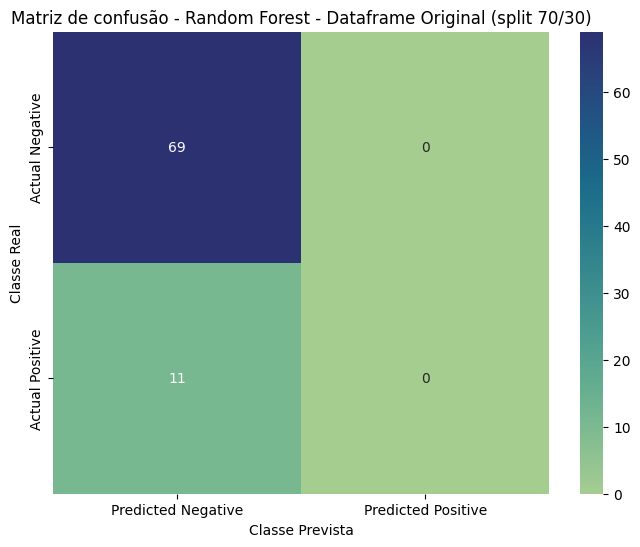

In [68]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_df_orto_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Dataframe Original (split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.1.1.2. Cross-Validation

In [69]:
#(df_orto_X, df_orto_y)
# Aplicar modelo com Cross-Validation
clf_RF_df_orto_CV = RandomForestClassifier(random_state=42)
y_pred_RF_df_orto_CV = cross_val_predict(clf_RF_df_orto_CV, df_orto_X, df_orto_y, cv=5)
print(y_pred_RF_df_orto_CV)

# Obter matriz de confusão
conf_mtx_RF_df_orto_CV = confusion_matrix(df_orto_y, y_pred_RF_df_orto_CV)
print("Matriz de Confusão:")
print(conf_mtx_RF_df_orto_CV)

# Avaliação/Métricas do RandomForest - com 4 casas decimais
report_RF_df_orto_CV = classification_report(df_orto_y, y_pred_RF_df_orto_CV, digits=4, output_dict=True)
print(classification_report(df_orto_y, y_pred_RF_df_orto_CV, digits=4))

# Calcular valor da AUC
auc_RF_df_orto_CV = roc_auc_score(df_orto_y, y_pred_RF_df_orto_CV)
print("AUC:", auc_RF_df_orto_CV)

# Converter relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_df_orto_CV = pd.DataFrame(report_RF_df_orto_CV).transpose()
report_df_RF_df_orto_CV['AUC'] = auc_RF_df_orto_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_df_orto_CV = pd.DataFrame(conf_mtx_RF_df_orto_CV,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])

# Exportar para Excel
with pd.ExcelWriter('Proj-Dados/Orig-RF-classification-report_CV.xlsx') as writer:
    report_df_RF_df_orto_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_df_orto_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Exported to Excel successfully!")



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0]
Matriz de Confusão:
[[232   4]
 [ 25   4]]
              precision    recall  f1-score   support

           0     0.9027    0.9831    0.9412       236
           1     0.5000    0.1379    0.2162        29

    accuracy                         0.8906       265
   macro avg     0.7014    0.5605    0.5787       265
weighted avg     0.8587    0.8906    0.8618       265

AUC: 0.5604909409701929
Exported to Excel successfully!


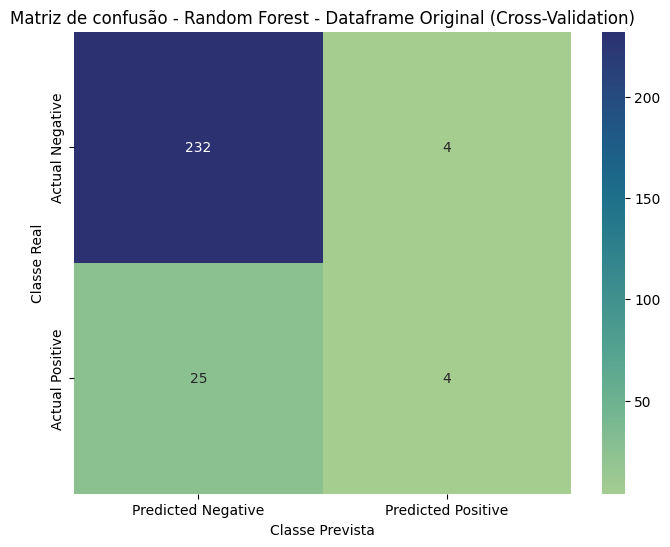

In [70]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_df_orto_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Dataframe Original (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.1.2. Para o dataframe undersampling

##### 4.1.2.1. - Split 70/30

In [71]:
# (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)

# Configuração e treino do modelo
clf_RF_under_70_30 = RandomForestClassifier(random_state=42)
clf_RF_under_70_30.fit(df_orto_under_X_train, df_orto_under_y_train)

# Previsões
y_pred_RF_under_70_30 = clf_RF_under_70_30.predict(df_orto_under_X_test)

# Avaliação
conf_mtx_RF_under_70_30 = confusion_matrix(df_orto_under_y_test, y_pred_RF_under_70_30)
report_RF_under_70_30 = classification_report(df_orto_under_y_test, y_pred_RF_under_70_30, digits=4, output_dict=True)
auc_RF_under_70_30 = roc_auc_score(df_orto_under_y_test, y_pred_RF_under_70_30)

# Converter o dicionário para DataFrame e transpor para melhorar a formatação
report_df_RF_under_70_30 = pd.DataFrame(report_RF_under_70_30).transpose()

# Adicionar a AUC ao DataFrame
report_df_RF_under_70_30['AUC'] = auc_RF_under_70_30

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_under_70_30 = pd.DataFrame(conf_mtx_RF_under_70_30,
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-RF-classification-report_70_30.xlsx') as writer:
    report_df_RF_under_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_under_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_under_70_30)

Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.782609  0.947368  0.857143  19.000000  0.723684
1              0.833333  0.500000  0.625000  10.000000  0.723684
accuracy       0.793103  0.793103  0.793103   0.793103  0.723684
macro avg      0.807971  0.723684  0.741071  29.000000  0.723684
weighted avg   0.800100  0.793103  0.777094  29.000000  0.723684


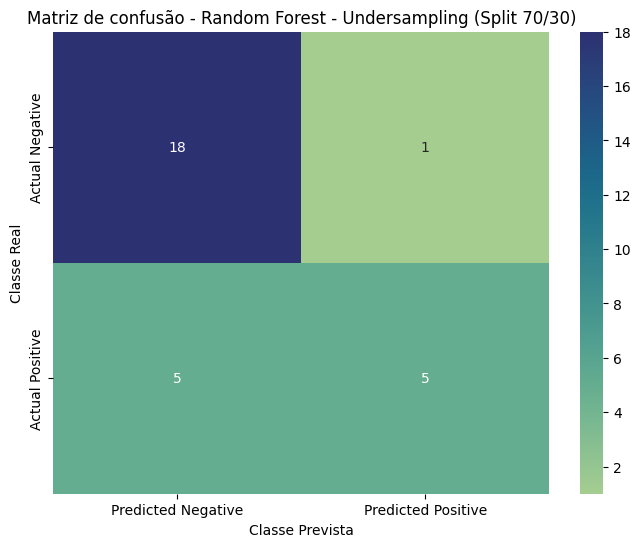

In [72]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_under_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Undersampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.1.2.2. - Cross-Validation

In [73]:
#(df_orto_under_X, df_orto_under_y)
# Aplicação do modelo com Cross-Validation
clf_RF_under_CV = RandomForestClassifier(random_state=42)
y_pred_RF_under_CV = cross_val_predict(clf_RF_under_CV, df_orto_under_X, df_orto_under_y, cv=5)

# Avaliação
conf_mtx_RF_under_CV = confusion_matrix(df_orto_under_y, y_pred_RF_under_CV)
print("Matriz de Confusão:")
print(conf_mtx_RF_under_CV)

# Gerar relatório de classificação
report_RF_under_CV = classification_report(df_orto_under_y, y_pred_RF_under_CV, digits=4, output_dict=True)
print(classification_report(df_orto_under_y, y_pred_RF_under_CV, digits=4))

# Calcular valor da AUC diretamente das previsões
auc_RF_under_CV = roc_auc_score(df_orto_under_y, y_pred_RF_under_CV)
print("AUC:", auc_RF_under_CV)

# Converter o dicionário para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_under_CV = pd.DataFrame(report_RF_under_CV).transpose()
report_df_RF_under_CV['AUC'] = auc_RF_under_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_under_CV = pd.DataFrame(conf_mtx_RF_under_CV,
                                          index=['Actual Negative', 'Actual Positive'],
                                          columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-RF-classification-report_CV.xlsx') as writer:
    report_df_RF_under_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_under_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")


Matriz de Confusão:
[[60  7]
 [16 13]]
              precision    recall  f1-score   support

           0     0.7895    0.8955    0.8392        67
           1     0.6500    0.4483    0.5306        29

    accuracy                         0.7604        96
   macro avg     0.7197    0.6719    0.6849        96
weighted avg     0.7473    0.7604    0.7460        96

AUC: 0.6718991250643336
Results exported to Excel successfully!


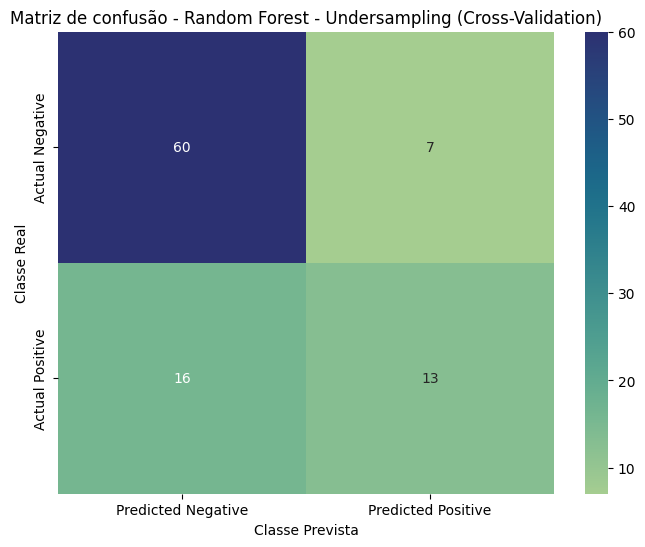

In [74]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_under_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Undersampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.1.3. Para o dataframe oversampling

##### 4.1.3.1. Split 70/30

In [75]:
# (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)

# Configuração e treino do modelo Random Forest no dataset oversampled
clf_RF_over_70_30 = RandomForestClassifier(random_state=42)
clf_RF_over_70_30.fit(df_orto_over_X_train, df_orto_over_y_train)

# Previsões
y_pred_RF_over_70_30 = clf_RF_over_70_30.predict(df_orto_over_X_test)

# Avaliação
conf_mtx_RF_over_70_30 = confusion_matrix(df_orto_over_y_test, y_pred_RF_over_70_30)
report_RF_over_70_30 = classification_report(df_orto_over_y_test, y_pred_RF_over_70_30, digits=4, output_dict=True)
auc_RF_over_70_30 = roc_auc_score(df_orto_over_y_test, y_pred_RF_over_70_30)

# Converter o relatório para DataFrame e adicionar AUC
report_df_RF_over_70_30 = pd.DataFrame(report_RF_over_70_30).transpose()
report_df_RF_over_70_30['AUC'] = auc_RF_over_70_30

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_over_70_30 = pd.DataFrame(conf_mtx_RF_over_70_30,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_RF_over_70_30)
# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-RF-classification-report_70_30.xlsx') as writer:
    report_df_RF_over_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_over_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_over_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  69                   4
Actual Positive                   1                  44
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.985714  0.945205  0.965035   73.000000  0.961492
1              0.916667  0.977778  0.946237   45.000000  0.961492
accuracy       0.957627  0.957627  0.957627    0.957627  0.961492
macro avg      0.951190  0.961492  0.955636  118.000000  0.961492
weighted avg   0.959383  0.957627  0.957866  118.000000  0.961492


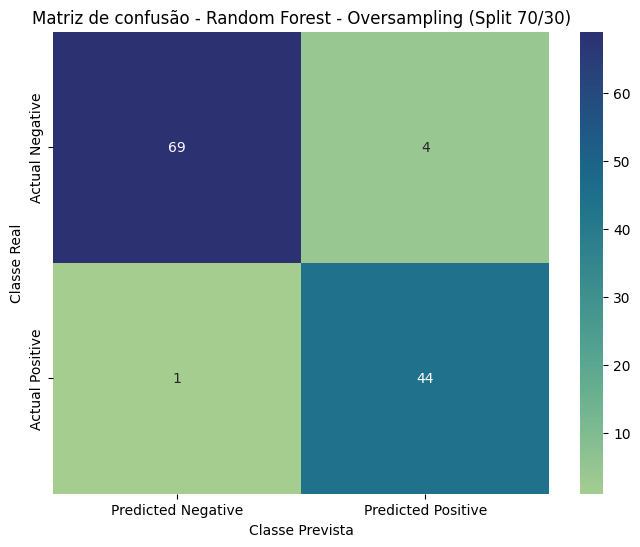

In [76]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_over_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Oversampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.1.3.2. - Cross-Validation

In [77]:
#(df_orto_over_X, df_orto_over_y) 
# Aplicação do modelo com Cross-Validation para o dataframe oversampled
clf_RF_over_CV = RandomForestClassifier(random_state=42)
y_pred_RF_over_CV = cross_val_predict(clf_RF_over_CV, df_orto_over_X, df_orto_over_y, cv=5)

# Avaliação
conf_mtx_RF_over_CV = confusion_matrix(df_orto_over_y, y_pred_RF_over_CV)
report_RF_over_CV = classification_report(df_orto_over_y, y_pred_RF_over_CV, digits=4, output_dict=True)
auc_RF_over_CV = roc_auc_score(df_orto_over_y, y_pred_RF_over_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_RF_over_CV = pd.DataFrame(report_RF_over_CV).transpose()
report_df_RF_over_CV['AUC'] = auc_RF_over_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_RF_over_CV = pd.DataFrame(conf_mtx_RF_over_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_RF_over_CV)

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-RF-classification-report_CV.xlsx') as writer:
    report_df_RF_over_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_RF_over_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_over_CV)


                 Predicted Negative  Predicted Positive
Actual Negative                 220                  16
Actual Positive                  13                 144
Results exported to Excel successfully!
              precision    recall  f1-score     support     AUC
0              0.944206  0.932203  0.938166  236.000000  0.9247
1              0.900000  0.917197  0.908517  157.000000  0.9247
accuracy       0.926209  0.926209  0.926209    0.926209  0.9247
macro avg      0.922103  0.924700  0.923342  393.000000  0.9247
weighted avg   0.926546  0.926209  0.926322  393.000000  0.9247


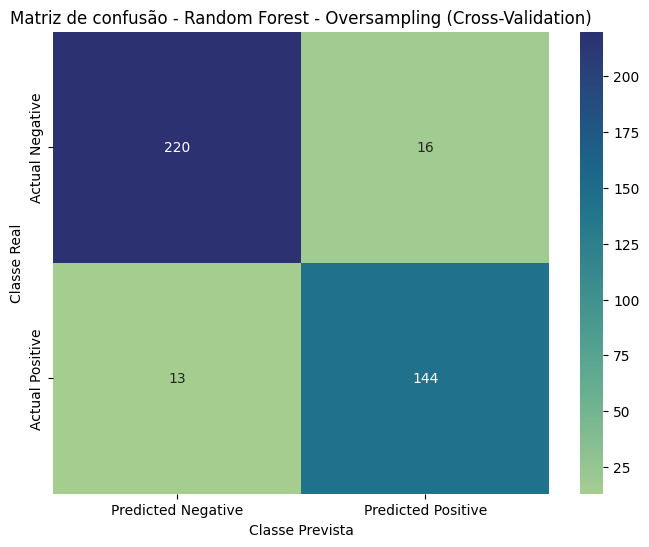

In [78]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_RF_over_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Random Forest - Oversampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()

### 4.2. Decision Tree


#### 4.2.1. Para o dataframe original 

##### 4.2.1.1. Split 70/30

In [79]:
#(df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
# Configuração e treinamento do modelo Decision Tree no dataset original
clf_DT_orig_70_30 = DecisionTreeClassifier(random_state=42)
clf_DT_orig_70_30.fit(df_orto_X_train, df_orto_y_train)

# Previsões
y_pred_DT_orig_70_30 = clf_DT_orig_70_30.predict(df_orto_X_test)

In [80]:
# Avaliação
conf_mtx_DT_orig_70_30 = confusion_matrix(df_orto_y_test, y_pred_DT_orig_70_30)
report_DT_orig_70_30 = classification_report(df_orto_y_test, y_pred_DT_orig_70_30, digits=4, output_dict=True)
auc_DT_orig_70_30 = roc_auc_score(df_orto_y_test, y_pred_DT_orig_70_30)

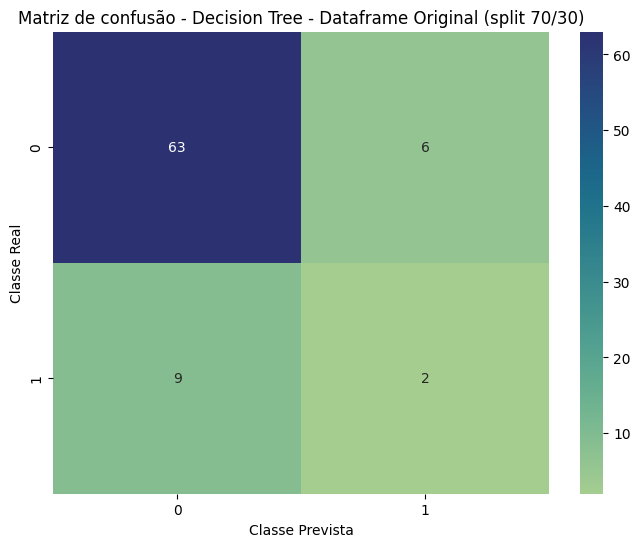

In [81]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_DT_orig_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Dataframe Original (split 70/30)")

# Mostrar o gráfico
plt.show()

In [82]:
# Converter o relatório para DataFrame, transpor e adicionar AUC
report_df_DT_orig_70_30 = pd.DataFrame(report_DT_orig_70_30).transpose()
report_df_DT_orig_70_30['AUC'] = auc_DT_orig_70_30

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_orig_70_30 = pd.DataFrame(conf_mtx_DT_orig_70_30,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])

print(conf_matrix_df_DT_orig_70_30)
# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Orig-DT-classification-report_70_30.xlsx') as writer:
    report_df_DT_orig_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_orig_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_orig_70_30)

                 Predicted Negative  Predicted Positive
Actual Negative                  63                   6
Actual Positive                   9                   2
Results exported to Excel successfully!
              precision    recall  f1-score  support       AUC
0              0.875000  0.913043  0.893617  69.0000  0.547431
1              0.250000  0.181818  0.210526  11.0000  0.547431
accuracy       0.812500  0.812500  0.812500   0.8125  0.547431
macro avg      0.562500  0.547431  0.552072  80.0000  0.547431
weighted avg   0.789062  0.812500  0.799692  80.0000  0.547431


##### 4.2.1.2. Cross-Validation

In [83]:
#(df_orto_y,df_orto_X)
# Aplicação do modelo com Cross-Validation para o dataset original
y_pred_DT_orig_CV = cross_val_predict(DecisionTreeClassifier(random_state=42), df_orto_X, df_orto_y, cv=5)

# Avaliação
conf_mtx_DT_orig_CV = confusion_matrix(df_orto_y, y_pred_DT_orig_CV)
report_DT_orig_CV = classification_report(df_orto_y, y_pred_DT_orig_CV, digits=4, output_dict=True)
auc_DT_orig_CV = roc_auc_score(df_orto_y, y_pred_DT_orig_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_DT_orig_CV = pd.DataFrame(report_DT_orig_CV).transpose()
report_df_DT_orig_CV['AUC'] = auc_DT_orig_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_orig_CV = pd.DataFrame(conf_mtx_DT_orig_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_DT_orig_CV)

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Orig-DT-classification-report_CV.xlsx') as writer:
    report_df_DT_orig_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_orig_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")



                 Predicted Negative  Predicted Positive
Actual Negative                 214                  22
Actual Positive                  20                   9
Results exported to Excel successfully!


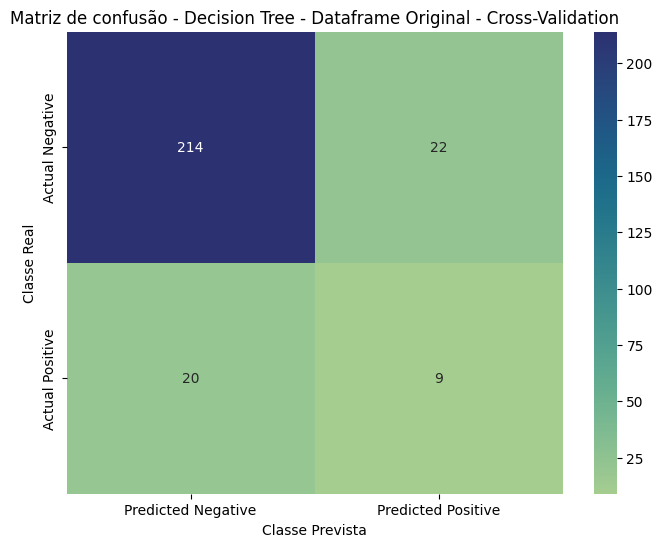

In [84]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_orig_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Dataframe Original - Cross-Validation")

# Mostrar o gráfico
plt.show()

#### 4.2.2 Para o dataframe undersampling

##### 4.2.2.1 - Split 70/30

In [85]:
#(df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)
# Treinar modelo de árvore de decisão no dataset de undersampling
clf_DT_under_70_30 = DecisionTreeClassifier(random_state=42)
clf_DT_under_70_30.fit(df_orto_under_X_train, df_orto_under_y_train)

# Predição no conjunto de teste
y_pred_DT_under_70_30 = clf_DT_under_70_30.predict(df_orto_under_X_test)

# Geração do relatório de classificação
report_DT_under_70_30 = classification_report(df_orto_under_y_test, y_pred_DT_under_70_30, digits=4, output_dict=True)

# Cálculo da AUC
auc_DT_under_70_30 = roc_auc_score(df_orto_under_y_test, y_pred_DT_under_70_30)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_under_70_30 = pd.DataFrame(confusion_matrix(df_orto_under_y_test, y_pred_DT_under_70_30),
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

print(conf_matrix_df_DT_under_70_30)

# Criar DataFrame para o relatório de classificação e adicionar AUC
report_df_DT_under_70_30 = pd.DataFrame(report_DT_under_70_30).transpose()
report_df_DT_under_70_30['AUC'] = auc_DT_under_70_30


# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-DT-classification-report_70_30.xlsx') as writer:
    report_df_DT_under_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_under_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_RF_under_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  15                   4
Actual Positive                   4                   6
Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.782609  0.947368  0.857143  19.000000  0.723684
1              0.833333  0.500000  0.625000  10.000000  0.723684
accuracy       0.793103  0.793103  0.793103   0.793103  0.723684
macro avg      0.807971  0.723684  0.741071  29.000000  0.723684
weighted avg   0.800100  0.793103  0.777094  29.000000  0.723684


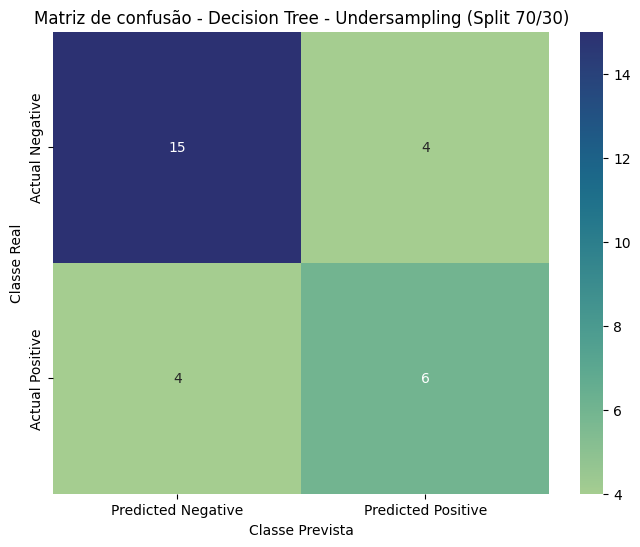

In [86]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_under_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Undersampling (Split 70/30)")

# Mostrar o gráfico
plt.show()


##### 4.2.2.2 - Cross-Validation

In [87]:
#(df_orto_under_y,df_orto_under_X)
# Aplicação do modelo com Cross-Validation para o dataset de undersampling
y_pred_DT_under_CV = cross_val_predict(DecisionTreeClassifier(random_state=42), df_orto_under_X, df_orto_under_y, cv=5)

# Avaliação
conf_mtx_DT_under_CV = confusion_matrix(df_orto_under_y, y_pred_DT_under_CV)
report_DT_under_CV = classification_report(df_orto_under_y, y_pred_DT_under_CV, digits=4, output_dict=True)
auc_DT_under_CV = roc_auc_score(df_orto_under_y, y_pred_DT_under_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_DT_under_CV = pd.DataFrame(report_DT_under_CV).transpose()
report_df_DT_under_CV['AUC'] = auc_DT_under_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_under_CV = pd.DataFrame(conf_mtx_DT_under_CV,
                                          index=['Actual Negative', 'Actual Positive'],
                                          columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Under-DT-classification-report_CV.xlsx') as writer:
    report_df_DT_under_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_under_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_under_CV)



Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.753623  0.776119  0.764706  67.000000  0.594956
1              0.444444  0.413793  0.428571  29.000000  0.594956
accuracy       0.666667  0.666667  0.666667   0.666667  0.594956
macro avg      0.599034  0.594956  0.596639  96.000000  0.594956
weighted avg   0.660225  0.666667  0.663165  96.000000  0.594956


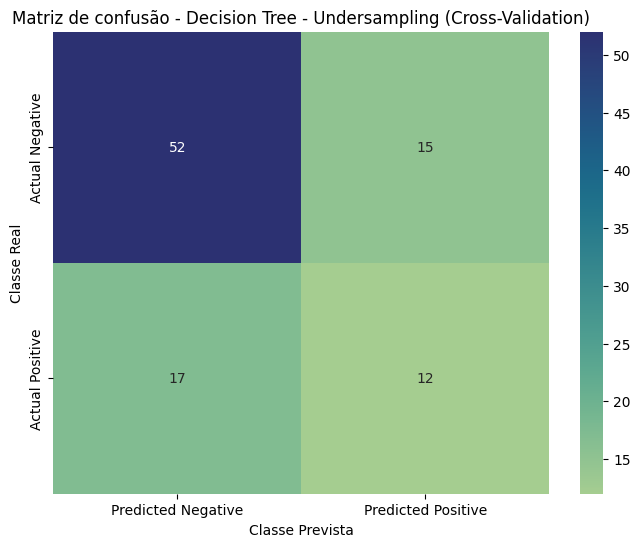

In [88]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_under_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Undersampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()


#### 4.2.3 Para o dataframe oversampling

##### 4.2.3.1 Decision Tree - split 70/30

In [89]:
#(df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)
# Configuração e treino do modelo Decision Tree no dataset oversampled
clf_DT_over_70_30 = DecisionTreeClassifier(random_state=42)
clf_DT_over_70_30.fit(df_orto_over_X_train, df_orto_over_y_train)

# Previsões
y_pred_DT_over_70_30 = clf_DT_over_70_30.predict(df_orto_over_X_test)

# Geração do relatório de classificação
report_DT_over_70_30 = classification_report(df_orto_over_y_test, y_pred_DT_over_70_30, digits=4, output_dict=True)

# Cálculo da AUC
auc_DT_over_70_30 = roc_auc_score(df_orto_over_y_test, y_pred_DT_over_70_30)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_over_70_30 = pd.DataFrame(confusion_matrix(df_orto_over_y_test, y_pred_DT_over_70_30),
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

print(conf_matrix_df_DT_over_70_30)

# Criar DataFrame para o relatório de classificação e adicionar AUC
report_df_DT_over_70_30 = pd.DataFrame(report_DT_over_70_30).transpose()
report_df_DT_over_70_30['AUC'] = auc_DT_over_70_30

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Over-DT-classification-report_70_30.xlsx') as writer:
    report_df_DT_over_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_over_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_over_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  62                  11
Actual Positive                   7                  38
Results exported to Excel successfully!
              precision    recall  f1-score     support      AUC
0              0.898551  0.849315  0.873239   73.000000  0.84688
1              0.775510  0.844444  0.808511   45.000000  0.84688
accuracy       0.847458  0.847458  0.847458    0.847458  0.84688
macro avg      0.837030  0.846880  0.840875  118.000000  0.84688
weighted avg   0.851628  0.847458  0.848555  118.000000  0.84688


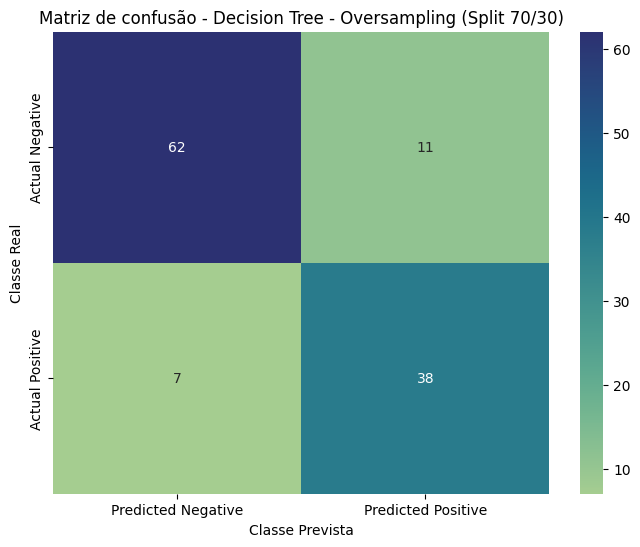

In [90]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_over_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Oversampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.2.3.2 Decision Tree - Cross-Validation

In [91]:
#(df_orto_over_y,df_orto_over_X)
# Aplicação do modelo com Cross-Validation para o dataset oversampled
y_pred_DT_over_CV = cross_val_predict(DecisionTreeClassifier(random_state=42), df_orto_over_X, df_orto_over_y, cv=5)

# Avaliação
conf_mtx_DT_over_CV = confusion_matrix(df_orto_over_y, y_pred_DT_over_CV)
report_DT_over_CV = classification_report(df_orto_over_y, y_pred_DT_over_CV, digits=4, output_dict=True)
auc_DT_over_CV = roc_auc_score(df_orto_over_y, y_pred_DT_over_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_DT_over_CV = pd.DataFrame(report_DT_over_CV).transpose()
report_df_DT_over_CV['AUC'] = auc_DT_over_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_DT_over_CV = pd.DataFrame(conf_mtx_DT_over_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-DT-classification-report_CV.xlsx') as writer:
    report_df_DT_over_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_DT_over_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_DT_over_CV)


Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.897196  0.813559  0.853333  236.000000  0.836716
1              0.754190  0.859873  0.803571  157.000000  0.836716
accuracy       0.832061  0.832061  0.832061    0.832061  0.836716
macro avg      0.825693  0.836716  0.828452  393.000000  0.836716
weighted avg   0.840067  0.832061  0.833454  393.000000  0.836716


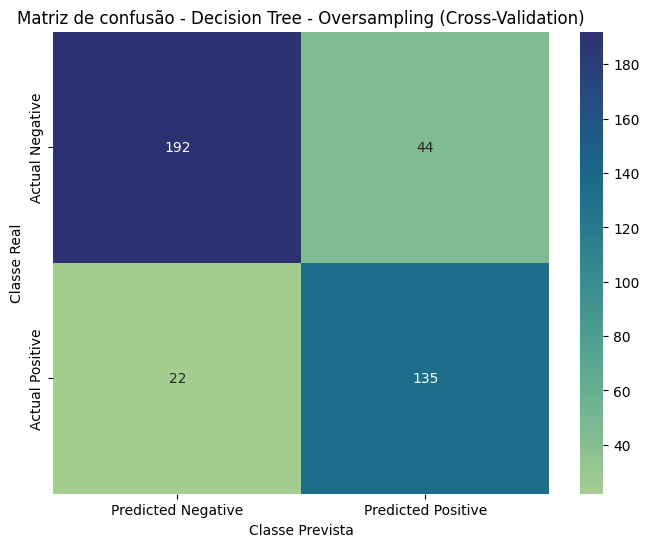

In [92]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_matrix_df_DT_over_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Decision Tree - Oversampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()


### 4.3. Regressão Logística

#### 4.3.1 Dataframe Original 

##### 4.3.1.1. Split 70/30

In [93]:
#(df_orto_X_train, df_orto_X_test, df_orto_y_train, df_orto_y_test)
# Configuração e treino do modelo de Regressão Logística
clf_LR_orig_70_30 = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
clf_LR_orig_70_30.fit(df_orto_X_train, df_orto_y_train)

# Previsões
y_pred_LR_orig_70_30 = clf_LR_orig_70_30.predict(df_orto_X_test)

# Obter matriz de confusão
conf_mtx_LR_orig_70_30 = confusion_matrix(df_orto_y_test, y_pred_LR_orig_70_30)
print("Matriz de Confusão:")
print(conf_mtx_LR_orig_70_30)

# Avaliação/Métricas do Modelo
report_LR_orig_70_30 = classification_report(df_orto_y_test, y_pred_LR_orig_70_30, digits=4, output_dict=True)
print(classification_report(df_orto_y_test, y_pred_LR_orig_70_30, digits=4))

# Calcular valor da AUC
auc_LR_orig_70_30 = roc_auc_score(df_orto_y_test, y_pred_LR_orig_70_30)
print("AUC:", auc_LR_orig_70_30)

# Converter relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_LR_orig_70_30 = pd.DataFrame(report_LR_orig_70_30).transpose()
report_df_LR_orig_70_30['AUC'] = auc_LR_orig_70_30  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_orig_70_30 = pd.DataFrame(conf_mtx_LR_orig_70_30,
                                               index=['Actual Negative', 'Actual Positive'],
                                               columns=['Predicted Negative', 'Predicted Positive'])

# Exportar para Excel
with pd.ExcelWriter('Proj-Dados/Orig-LR-classification-report_70_30.xlsx') as writer:
    report_df_LR_orig_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_orig_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_orig_70_30)



Matriz de Confusão:
[[65  4]
 [ 9  2]]
              precision    recall  f1-score   support

           0     0.8784    0.9420    0.9091        69
           1     0.3333    0.1818    0.2353        11

    accuracy                         0.8375        80
   macro avg     0.6059    0.5619    0.5722        80
weighted avg     0.8034    0.8375    0.8164        80

AUC: 0.5619235836627141
Results exported to Excel successfully!
              precision    recall  f1-score  support       AUC
0              0.878378  0.942029  0.909091  69.0000  0.561924
1              0.333333  0.181818  0.235294  11.0000  0.561924
accuracy       0.837500  0.837500  0.837500   0.8375  0.561924
macro avg      0.605856  0.561924  0.572193  80.0000  0.561924
weighted avg   0.803435  0.837500  0.816444  80.0000  0.561924


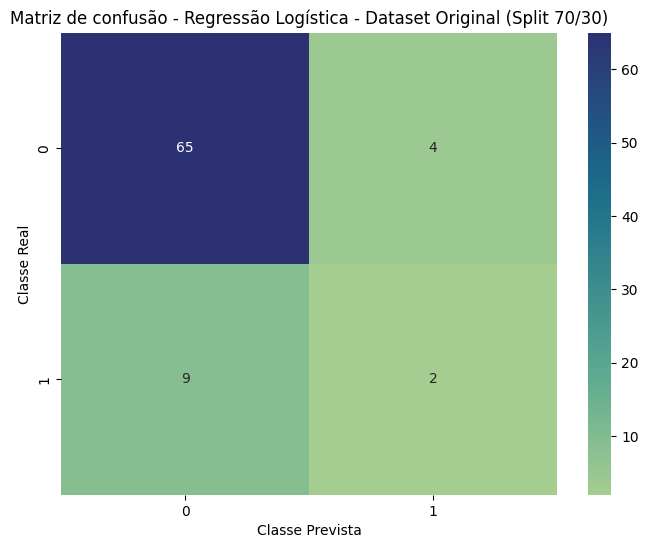

In [94]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_orig_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Dataset Original (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.3.2.1. Cross-Validation

In [95]:
#(df_orto_y,df_orto_X)
# Aplicação do modelo com Cross-Validation para o dataset original, com aumento do número de iterações
clf_LR_orig_CV = LogisticRegression(random_state=42, solver='liblinear',  max_iter=5000)
y_pred_LR_orig_CV = cross_val_predict(clf_LR_orig_CV, df_orto_X, df_orto_y, cv=5)

# Avaliação
conf_mtx_LR_orig_CV = confusion_matrix(df_orto_y, y_pred_LR_orig_CV)
report_LR_orig_CV = classification_report(df_orto_y, y_pred_LR_orig_CV, digits=4, output_dict=True)
auc_LR_orig_CV = roc_auc_score(df_orto_y, y_pred_LR_orig_CV)

# Converter o relatório para DataFrame e adicionar AUC diretamente como uma coluna
report_df_LR_orig_CV = pd.DataFrame(report_LR_orig_CV).transpose()
report_df_LR_orig_CV['AUC'] = auc_LR_orig_CV  # Adicionar AUC diretamente

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_orig_CV = pd.DataFrame(conf_mtx_LR_orig_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_DT_orig_CV)

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Orig-LR-classification-report_CV.xlsx') as writer:
    report_df_LR_orig_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_orig_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_orig_CV)


                 Predicted Negative  Predicted Positive
Actual Negative                 214                  22
Actual Positive                  20                   9
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.889344  0.919492  0.904167  236.000000  0.494229
1              0.095238  0.068966  0.080000   29.000000  0.494229
accuracy       0.826415  0.826415  0.826415    0.826415  0.494229
macro avg      0.492291  0.494229  0.492083  265.000000  0.494229
weighted avg   0.802442  0.826415  0.813975  265.000000  0.494229


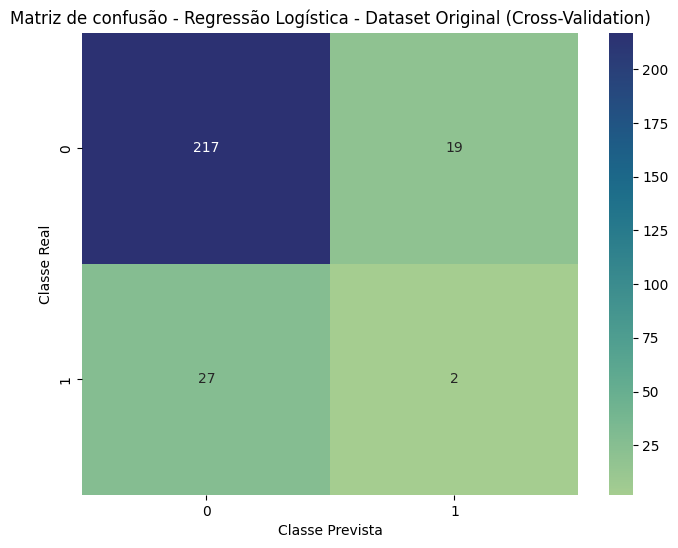

In [96]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_orig_CV, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Dataset Original (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.3.2. Para o dataframe undersampling 

##### 4.3.2.1 Split 70/30

In [97]:
# (df_orto_under_X_train, df_orto_under_X_test, df_orto_under_y_train, df_orto_under_y_test)

# Configuração e treino do modelo de Regressão Logística no dataset de undersampling
clf_LR_under_70_30 = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
clf_LR_under_70_30.fit(df_orto_under_X_train, df_orto_under_y_train)

# Previsões
y_pred_LR_under_70_30 = clf_LR_under_70_30.predict(df_orto_under_X_test)

# Avaliação
conf_mtx_LR_under_70_30 = confusion_matrix(df_orto_under_y_test, y_pred_LR_under_70_30)
report_LR_under_70_30 = classification_report(df_orto_under_y_test, y_pred_LR_under_70_30, digits=4, output_dict=True)
auc_LR_under_70_30 = roc_auc_score(df_orto_under_y_test, y_pred_LR_under_70_30)

# Exportar resultados
report_df_LR_under_70_30 = pd.DataFrame(report_LR_under_70_30).transpose()
report_df_LR_under_70_30['AUC'] = auc_LR_under_70_30
print(report_df_LR_under_70_30)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_under_70_30 = pd.DataFrame(conf_mtx_LR_under_70_30,
                                             index=['Actual Negative', 'Actual Positive'],
                                             columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-LR-classification-report_70_30.xlsx') as writer:
    report_df_LR_under_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_under_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_under_70_30)

              precision    recall  f1-score    support  AUC
0              0.760000  1.000000  0.863636  19.000000  0.7
1              1.000000  0.400000  0.571429  10.000000  0.7
accuracy       0.793103  0.793103  0.793103   0.793103  0.7
macro avg      0.880000  0.700000  0.717532  29.000000  0.7
weighted avg   0.842759  0.793103  0.762875  29.000000  0.7
Results exported to Excel successfully!
              precision    recall  f1-score    support  AUC
0              0.760000  1.000000  0.863636  19.000000  0.7
1              1.000000  0.400000  0.571429  10.000000  0.7
accuracy       0.793103  0.793103  0.793103   0.793103  0.7
macro avg      0.880000  0.700000  0.717532  29.000000  0.7
weighted avg   0.842759  0.793103  0.762875  29.000000  0.7


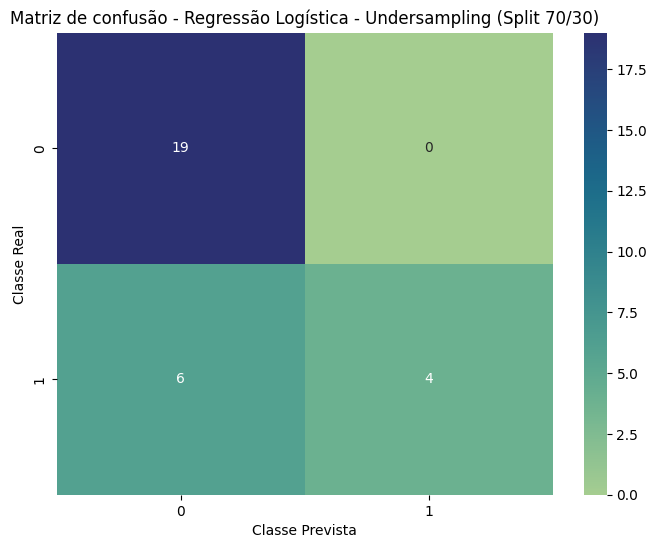

In [98]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_under_70_30, annot=True, fmt="d", cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores


# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Undersampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.3.2.2. Cross-Validation

In [99]:
#(df_orto_under_X, df_orto_under_y)
# Aplicação do modelo com Cross-Validation para o dataset de undersampling
clf_LR_under_CV = LogisticRegression(random_state=42, max_iter=5000, solver='liblinear')
y_pred_LR_under_CV = cross_val_predict(clf_LR_under_CV, df_orto_under_X, df_orto_under_y, cv=5)

# Avaliação
conf_mtx_LR_under_CV = confusion_matrix(df_orto_under_y, y_pred_LR_under_CV)
print("Matriz de Confusão:")
print(conf_mtx_LR_under_CV)

# Gerar relatório de classificação
report_LR_under_CV = classification_report(df_orto_under_y, y_pred_LR_under_CV, digits=4, output_dict=True)
print(classification_report(df_orto_under_y, y_pred_LR_under_CV, digits=4))

# Calcular valor da AUC diretamente das previsões
auc_LR_under_CV = roc_auc_score(df_orto_under_y, y_pred_LR_under_CV)
print("AUC:", auc_RF_under_CV)

# Converter o dicionário para DataFrame e adicionar AUC diretamente como uma coluna
report_df_LR_under_CV = pd.DataFrame(report_LR_under_CV).transpose()
report_df_LR_under_CV['AUC'] = auc_LR_under_CV

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_under_CV = pd.DataFrame(conf_mtx_LR_under_CV,
                                          index=['Actual Negative', 'Actual Positive'],
                                          columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados
with pd.ExcelWriter('Proj-Dados/Under-LR-classification-report_CV.xlsx') as writer:
    report_df_LR_under_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_under_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")


Matriz de Confusão:
[[56 11]
 [12 17]]
              precision    recall  f1-score   support

           0     0.8235    0.8358    0.8296        67
           1     0.6071    0.5862    0.5965        29

    accuracy                         0.7604        96
   macro avg     0.7153    0.7110    0.7131        96
weighted avg     0.7582    0.7604    0.7592        96

AUC: 0.6718991250643336
Results exported to Excel successfully!


              precision    recall  f1-score    support  AUC
0              0.760000  1.000000  0.863636  19.000000  0.7
1              1.000000  0.400000  0.571429  10.000000  0.7
accuracy       0.793103  0.793103  0.793103   0.793103  0.7
macro avg      0.880000  0.700000  0.717532  29.000000  0.7
weighted avg   0.842759  0.793103  0.762875  29.000000  0.7


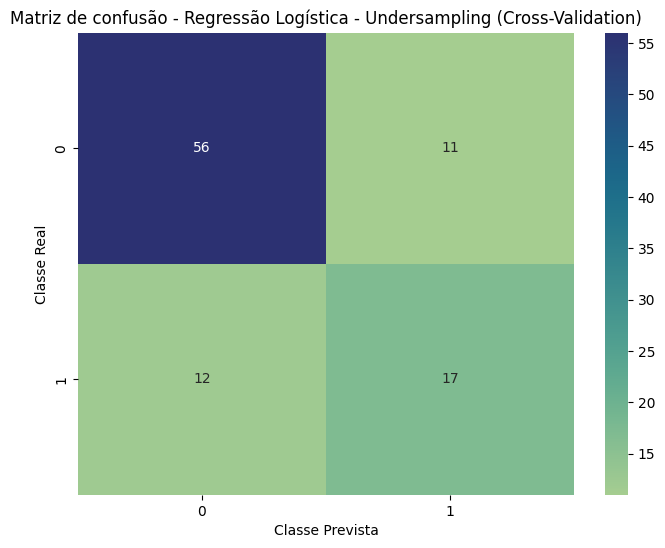

In [100]:
print(report_df_LR_under_70_30)
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_under_CV, annot=True, fmt="d",
            cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Undersampling (Cross-Validation)")

# Mostrar o gráfico
plt.show()

#### 4.3.3. Para o dataframe oversampling 

##### 4.3.3.1. Split 70/30

In [101]:
# (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)

# Configuração e treino do modelo de Regressão Logística no dataset de oversampling
clf_LR_over_70_30 = LogisticRegression(random_state=42,solver='liblinear', max_iter=5000)
clf_LR_over_70_30.fit(df_orto_over_X_train, df_orto_over_y_train)

# Previsões
y_pred_LR_over_70_30 = clf_LR_over_70_30.predict(df_orto_over_X_test)

# Avaliação
conf_mtx_LR_over_70_30 = confusion_matrix(df_orto_over_y_test, y_pred_LR_over_70_30)
report_LR_over_70_30 = classification_report(df_orto_over_y_test, y_pred_LR_over_70_30, digits=4, output_dict=True)
auc_LR_over_70_30 = roc_auc_score(df_orto_over_y_test, y_pred_LR_over_70_30)

# Exportar resultados
report_df_LR_over_70_30 = pd.DataFrame(report_LR_over_70_30).transpose()
report_df_LR_over_70_30['AUC'] = auc_LR_over_70_30
report_df_LR_over_70_30.to_excel('Proj-Dados/Over-LR-classification-report_70_30.xlsx')

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_over_70_30 = pd.DataFrame(conf_mtx_LR_over_70_30,
                                            index=['Actual Negative', 'Actual Positive'],
                                            columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df_LR_over_70_30)
# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-LR-classification-report_70_30.xlsx') as writer:
    report_df_LR_over_70_30.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_over_70_30.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_over_70_30)


                 Predicted Negative  Predicted Positive
Actual Negative                  68                   5
Actual Positive                   6                  39
Results exported to Excel successfully!
              precision    recall  f1-score    support       AUC
0              0.918919  0.931507  0.925170   73.00000  0.899087
1              0.886364  0.866667  0.876404   45.00000  0.899087
accuracy       0.906780  0.906780  0.906780    0.90678  0.899087
macro avg      0.902641  0.899087  0.900787  118.00000  0.899087
weighted avg   0.906504  0.906780  0.906573  118.00000  0.899087


              precision    recall  f1-score    support  AUC
0              0.760000  1.000000  0.863636  19.000000  0.7
1              1.000000  0.400000  0.571429  10.000000  0.7
accuracy       0.793103  0.793103  0.793103   0.793103  0.7
macro avg      0.880000  0.700000  0.717532  29.000000  0.7
weighted avg   0.842759  0.793103  0.762875  29.000000  0.7


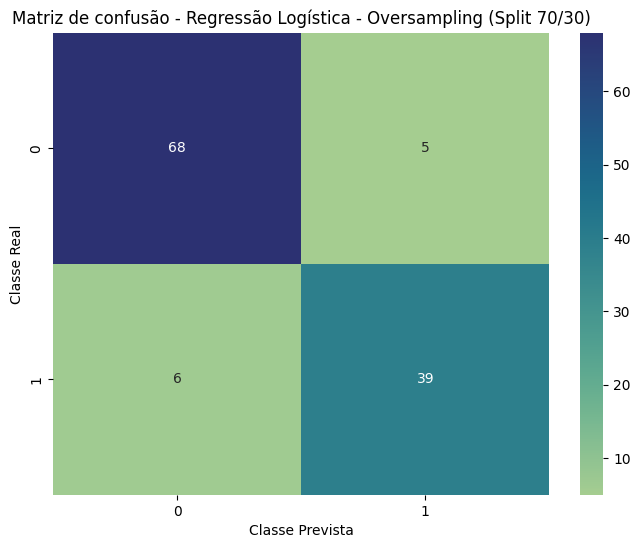

In [102]:
print(report_df_LR_under_70_30)
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.heatmap(conf_mtx_LR_over_70_30, annot=True, fmt="d",
            cmap='crest')  # Anotar o gráfico com os counts com números inteiros, cmap é para colocar cores

# Set labels for axes
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Add a title
plt.title("Matriz de confusão - Regressão Logística - Oversampling (Split 70/30)")

# Mostrar o gráfico
plt.show()

##### 4.3.3.2. Cross-Validation

In [103]:
# Aplicação do modelo com Cross-Validation
y_pred_LR_over_CV = cross_val_predict(LogisticRegression(random_state=42, solver='liblinear', max_iter=5000), df_orto_over_X, df_orto_over_y, cv=5)

# Avaliação
print(classification_report(df_orto_over_y, y_pred_LR_over_CV, digits=4))

# Calcular valor da AUC
auc_LR_over_CV = roc_auc_score(df_orto_over_y, y_pred_LR_over_CV)
print("AUC:", auc_LR_over_CV)

# Converter o relatório de classificação para DataFrame
report_dict_LR_over_CV = classification_report(df_orto_over_y, y_pred_LR_over_CV, digits=4, output_dict=True)
report_df_LR_over_CV = pd.DataFrame(report_dict_LR_over_CV).transpose()

# Adicionar a AUC ao DataFrame
report_df_LR_over_CV['AUC'] = auc_LR_over_CV

# Calcular a matriz de confusão
conf_matrix_LR_over_CV = confusion_matrix(df_orto_over_y, y_pred_LR_over_CV)

# Criar DataFrame para a matriz de confusão
conf_matrix_df_LR_over_CV = pd.DataFrame(conf_matrix_LR_over_CV,
                                         index=['Actual Negative', 'Actual Positive'],
                                         columns=['Predicted Negative', 'Predicted Positive'])

# Exportar resultados usando ExcelWriter
with pd.ExcelWriter('Proj-Dados/Over-LR-classification-report_CV.xlsx') as writer:
    report_df_LR_over_CV.to_excel(writer, sheet_name='Classification Report')
    conf_matrix_df_LR_over_CV.to_excel(writer, sheet_name='Confusion Matrix')

print("Results exported to Excel successfully!")
print(report_df_LR_over_CV)


              precision    recall  f1-score   support

           0     0.8800    0.8390    0.8590       236
           1     0.7738    0.8280    0.8000       157

    accuracy                         0.8346       393
   macro avg     0.8269    0.8335    0.8295       393
weighted avg     0.8376    0.8346    0.8354       393

AUC: 0.833504264277232
Results exported to Excel successfully!
              precision    recall  f1-score     support       AUC
0              0.880000  0.838983  0.859002  236.000000  0.833504
1              0.773810  0.828025  0.800000  157.000000  0.833504
accuracy       0.834606  0.834606  0.834606    0.834606  0.833504
macro avg      0.826905  0.833504  0.829501  393.000000  0.833504
weighted avg   0.837578  0.834606  0.835431  393.000000  0.833504


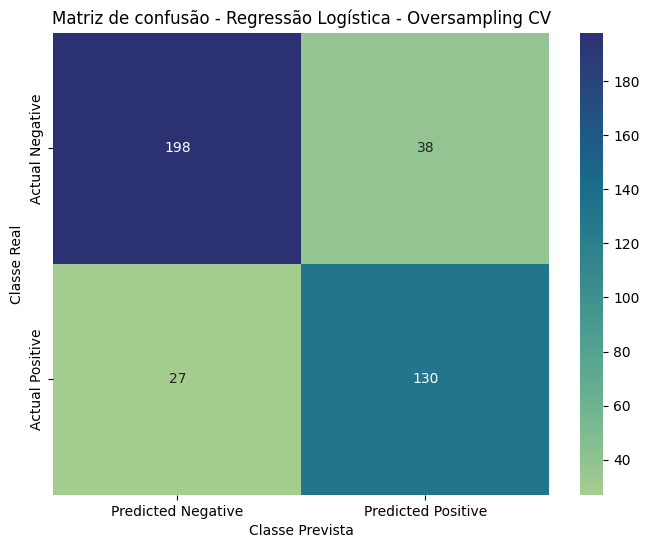

In [104]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_LR_over_CV, annot=True, fmt="d", cmap='crest')
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de confusão - Regressão Logística - Oversampling CV")

# Mostrar o gráfico
plt.show()

# Evaluation


            Importance       Std
PM6_90        0.057627  0.016433
PM6_0         0.044068  0.017285
Sexo          0.032203  0.003390
Fle_0         0.030508  0.011495
Idade         0.027119  0.014580
WR_90         0.022034  0.010169
Fle_90        0.016949  0.013129
EVA_0         0.010169  0.003390
IMC           0.008475  0.014181
Peso          0.006780  0.008303
Altura_cm     0.006780  0.006342
Satisfação    0.003390  0.010169
WAtotal_0     0.003390  0.008642
WD_90         0.001695  0.003390
WR_0          0.001695  0.003390
EVA_90       -0.001695  0.003390
WD_0         -0.003390  0.008642
WAtotal_90   -0.003390  0.004152


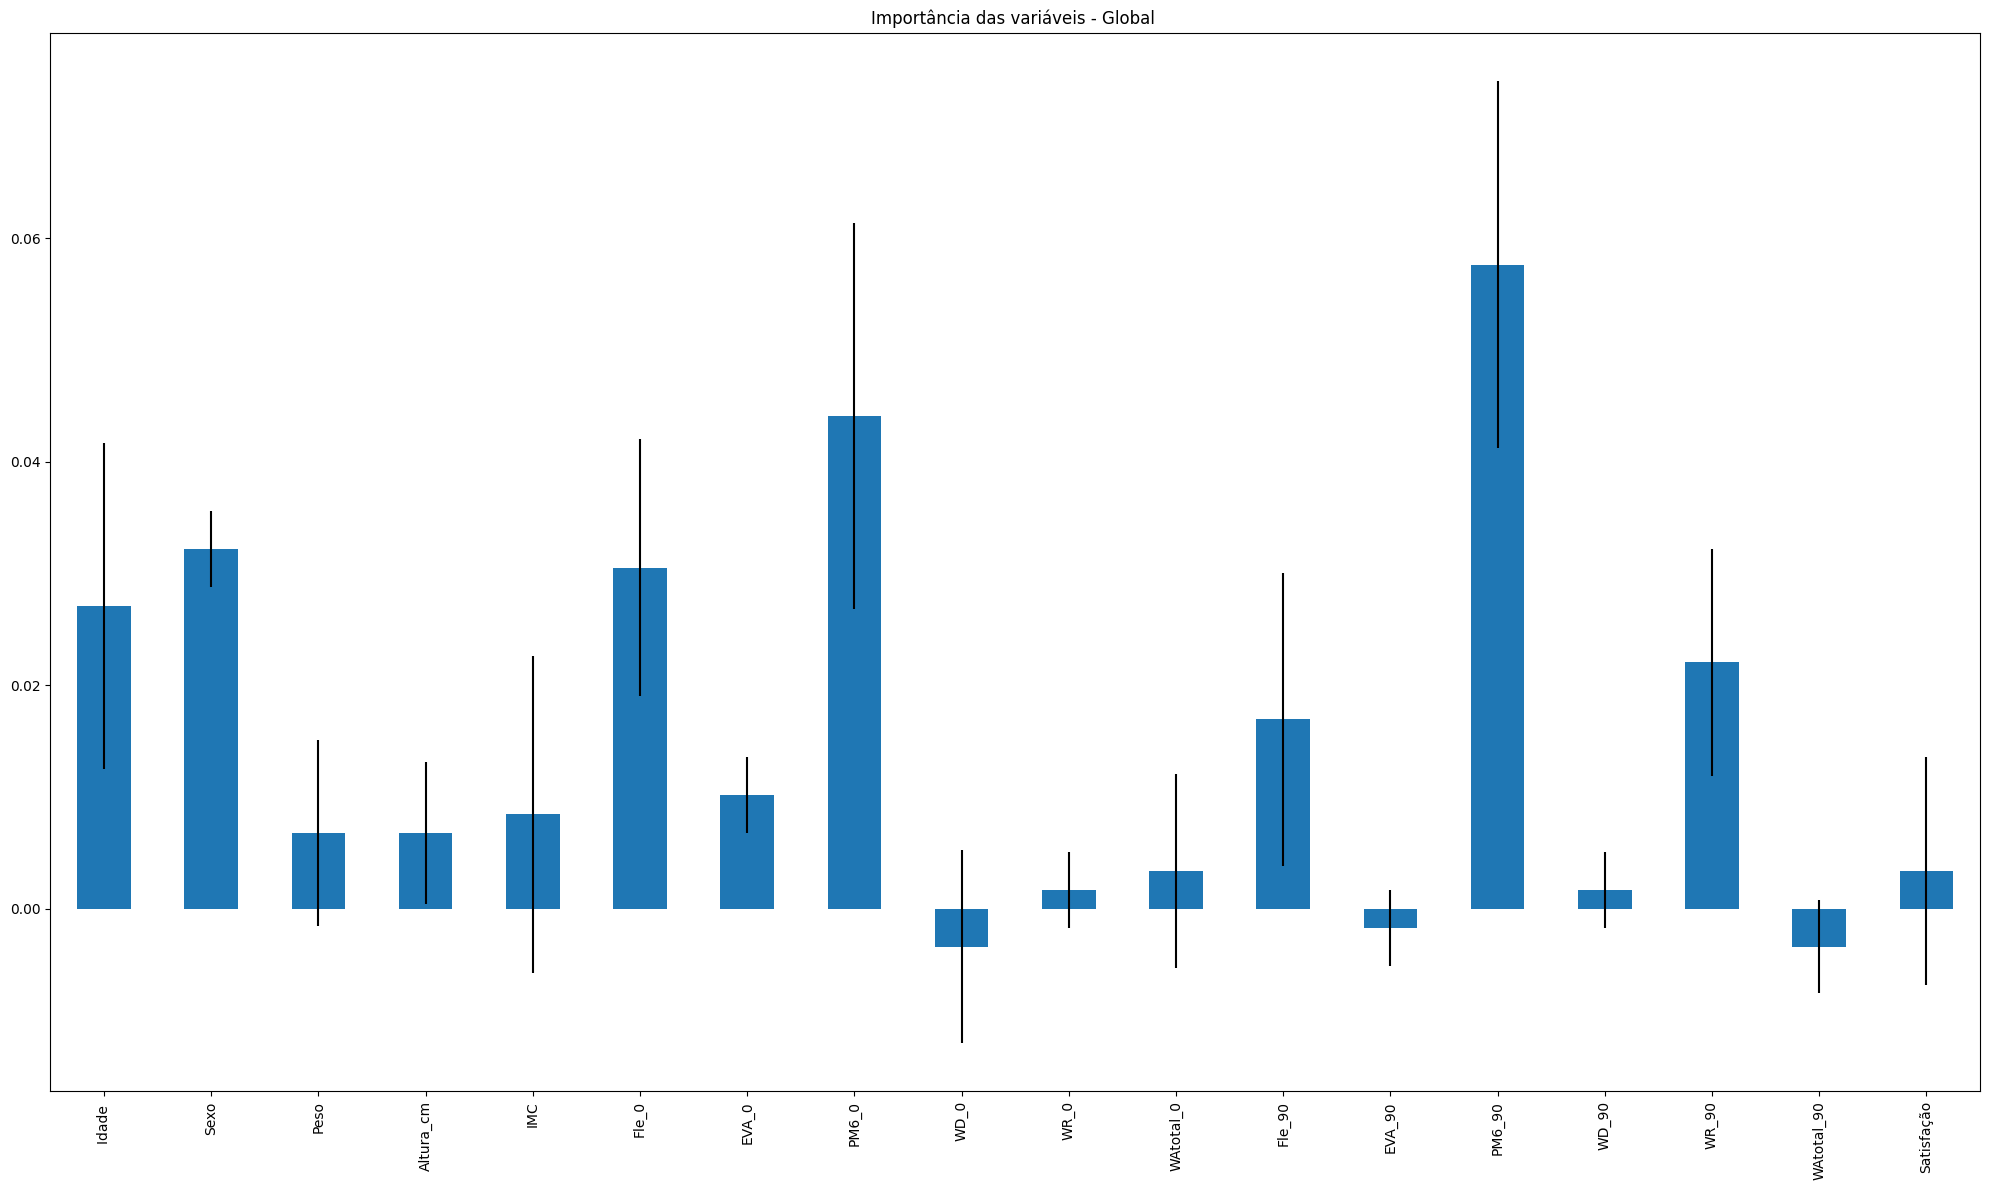

In [105]:
#Ver qual a importância das variáveis do modelo final escolhido
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# (df_orto_over_X_train, df_orto_over_X_test, df_orto_over_y_train, df_orto_over_y_test)


perm_importance = permutation_importance(clf_RF_over_70_30,df_orto_over_X_test, df_orto_over_y_test, random_state=42) #calcular as importâncias

feature_names = df_orto_over_X_test.columns #guardar nome das variáveis

sorted_idx = perm_importance.importances_mean.argsort() #ordenar as importâncias

#criar tabela com as variáveis, importâncias e seus desvios-padrões
df_importances = pd.DataFrame({'Importance': perm_importance.importances_mean, 'Std': perm_importance.importances_std}, index=feature_names).sort_values('Importance',ascending=False)
print(df_importances)

#criar gráfico para importâncias
forest_importances = pd.Series(perm_importance.importances_mean, index=feature_names)
fig, ax = plt.subplots(figsize=(20, 12))
forest_importances.plot.bar(yerr=perm_importance.importances_std, ax=ax)
ax.set_title("Importância das variáveis - Global ")
fig.tight_layout()
